In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Final Data Processing.

In [2]:
df = pd.read_csv('final_data_1_iter_128.csv') #iterations = 3, nbit = 1024

In [3]:
df

,name,molweight,critical temperature (K),acentric factor,boiling point (K),SMILES,ECFP_Bits
0,(+)-camphene,136.23704,638.00,0.2960,432.65,CC1(C)C2CCC(C2)C1=C,0000000010001000100000000000001001011000000001...
1,(-)-a-pinene,136.23704,647.00,0.3410,429.35,CC1=CC[C@H]2C[C@@H]1C2(C)C,0000000000001000100000000000001001001100000100...
2,(-)-camphene,136.23704,638.00,0.2960,439.95,CC1(C)C2CCC(C2)C1=C,0000000010001000100000000000001001011000000001...
3,"(1,1-dimethylbutyl)benzene",162.27492,697.15,0.4370,478.65,CCCC(C)(C)c1ccccc1,0000000011000000000000000010100001000010000000...
4,(1-butylhexadecyl)benzene,358.65124,851.65,0.7590,693.15,CCCCCCCCCCCCCCCC(CCCC)c1ccccc1,0100000000000000000000000010000001000010000000...
...,...,...,...,...,...,...,...
5895,vinylacetylene,52.07576,454.00,0.1180,278.25,C/C=C/C=C,0000000000000000100000000000000001000000000000...
5896,vinylcyclohexene,108.18328,599.00,0.3290,401.00,CC(C)/C=C/Cl,0100001000000000000100000001000001100000000000...
5897,water,18.01528,647.13,0.3449,373.15,C/C=C/CF,0000000010000000000000000000000001000000000000...
5898,zirconium chloride,233.03480,778.00,0.2980,604.15,C\C(c1ccccc1)=C(\C)c2ccccc2,0000000001000000000000000000000001000001000000...


In [4]:
df.describe()

,molweight,critical temperature (K),acentric factor,boiling point (K)
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,162.792075,650.688900,0.489841,460.435158
std,75.747231,109.978203,0.205024,95.686479
min,16.042760,126.200000,0.010500,77.340000
25%,114.230920,587.155000,0.332000,400.990000
50%,148.181780,639.915000,0.447000,456.150000
75%,182.349440,720.627500,0.645250,513.150000
max,626.327880,1314.000000,1.116000,797.080000


#### Get distribution of the different properties

array([[<AxesSubplot:title={'center':'molweight'}>,
        <AxesSubplot:title={'center':'critical temperature (K)'}>],
       [<AxesSubplot:title={'center':'acentric factor'}>,
        <AxesSubplot:title={'center':'boiling point (K)'}>]], dtype=object)

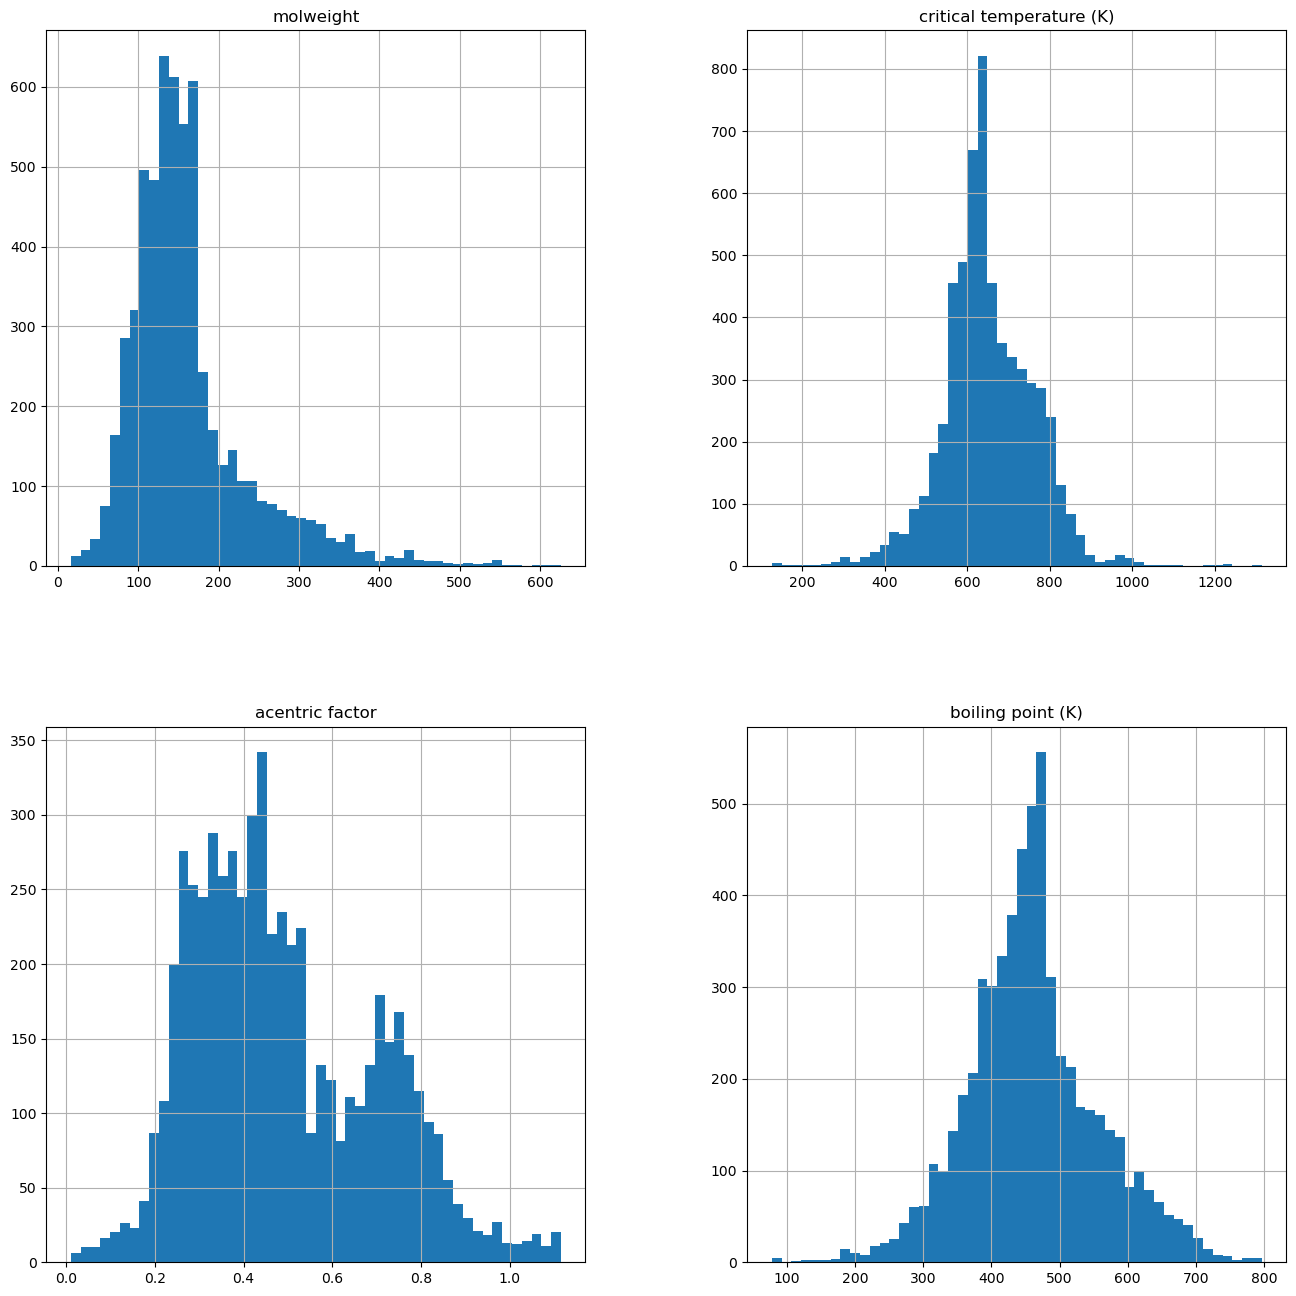

In [5]:
df[['molweight','critical temperature (K)','acentric factor','boiling point (K)']].hist(layout=(2,2),figsize=(16,16),bins=50)

In [6]:
df['ECFP_Bits'].apply(lambda x: len(x)).unique() #Verfiying all bit lengths

array([128], dtype=int64)

In [7]:
ECFP = df['ECFP_Bits'].str.split('',expand=True)

In [8]:
ECFP.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,
1,,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,
2,,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,
3,,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,
4,,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,


In [9]:
ECFP.drop(columns=[0,129],inplace=True)

In [10]:
ECFP.head()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


The ECFP dataframe can now be seen as Input X.

### Make dataset with molecular weight

In [11]:
ECFP_mol_weight = ECFP.copy(deep=True)
ECFP_mol_weight.insert(0,'MW',df['molweight'])

In [12]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,136.23704,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,136.23704,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,162.27492,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,358.65124,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Normalise Molecular Weight data (using MinMaxScaler())

In [13]:
ECFP_mol_weight['MW'] = (ECFP_mol_weight['MW']-ECFP_mol_weight['MW'].min())/(ECFP_mol_weight['MW'].max()-ECFP_mol_weight['MW'].min())

In [14]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.196948,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0.196948,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0.239613,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.561391,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## 2. Example 1: Using an ANN as a multi-output regression model. Using just ECFP

#### Neural Network Structure Used:
<br>**2 layer network** with dimensions: [64,3]
<br>**Activation Functions**: All Relu as an intial trial
<br>**Loss Function**: Mean Squared Error
<br>**Optimiser**: Adam
<br>**Epochs**: to be determined

In [15]:
#pip install -U scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
y_cols = ['critical temperature (K)','acentric factor','boiling point (K)']

In [18]:
X = ECFP.astype(float); y= df[y_cols].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Number of hidden units for each layer are given in parameter "layer_dims"

In [19]:
model = Sequential()
model.add(Dense(64,input_shape=(128,),activation='relu'))
model.add(Dense(3,activation='relu'))

In [20]:
model.compile(loss='mse',optimizer='adam')

In [21]:
X_train.dtypes

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
124    float64
125    float64
126    float64
127    float64
128    float64
Length: 128, dtype: object

In [22]:
model.fit(X_train,y_train,epochs = 300)

Epoch 1/300
148/148 [==============================] - 1s 908us/step - loss: 213220.9688
Epoch 2/300
148/148 [==============================] - 0s 1ms/step - loss: 179695.4375
Epoch 3/300
148/148 [==============================] - 0s 1ms/step - loss: 122989.2500
Epoch 4/300
148/148 [==============================] - 0s 1ms/step - loss: 69269.0312
Epoch 5/300
148/148 [==============================] - 0s 2ms/step - loss: 36516.6719
Epoch 6/300
148/148 [==============================] - 0s 2ms/step - loss: 23702.3281
Epoch 7/300
148/148 [==============================] - 0s 2ms/step - loss: 19617.1602
Epoch 8/300
148/148 [==============================] - 0s 2ms/step - loss: 18189.3730
Epoch 9/300
148/148 [==============================] - 0s 2ms/step - loss: 17484.6504
Epoch 10/300
148/148 [==============================] - 0s 2ms/step - loss: 16970.1562
Epoch 11/300
148/148 [==============================] - 0s 2ms/step - loss: 16531.4395
Epoch 12/300
148/148 [=========================

148/148 [==============================] - 1s 4ms/step - loss: 6414.4497
Epoch 96/300
148/148 [==============================] - 0s 3ms/step - loss: 6399.3574
Epoch 97/300
148/148 [==============================] - 0s 3ms/step - loss: 6400.0024
Epoch 98/300
148/148 [==============================] - 0s 3ms/step - loss: 6392.3804
Epoch 99/300
148/148 [==============================] - 0s 3ms/step - loss: 6379.8936
Epoch 100/300
148/148 [==============================] - 1s 4ms/step - loss: 6378.4995
Epoch 101/300
148/148 [==============================] - 0s 3ms/step - loss: 6373.3066
Epoch 102/300
148/148 [==============================] - 1s 4ms/step - loss: 6365.3223
Epoch 103/300
148/148 [==============================] - 1s 5ms/step - loss: 6369.3994
Epoch 104/300
148/148 [==============================] - 1s 4ms/step - loss: 6350.6890
Epoch 105/300
148/148 [==============================] - 0s 3ms/step - loss: 6354.1040
Epoch 106/300
148/148 [==============================] - 1s 4

148/148 [==============================] - 0s 2ms/step - loss: 6107.0435
Epoch 190/300
148/148 [==============================] - 0s 2ms/step - loss: 6105.7441
Epoch 191/300
148/148 [==============================] - 0s 2ms/step - loss: 6104.3345
Epoch 192/300
148/148 [==============================] - 0s 2ms/step - loss: 6096.1279
Epoch 193/300
148/148 [==============================] - 0s 2ms/step - loss: 6099.9204
Epoch 194/300
148/148 [==============================] - 0s 2ms/step - loss: 6096.1953
Epoch 195/300
148/148 [==============================] - 0s 2ms/step - loss: 6094.8032
Epoch 196/300
148/148 [==============================] - 0s 2ms/step - loss: 6089.6240
Epoch 197/300
148/148 [==============================] - 0s 2ms/step - loss: 6090.6479
Epoch 198/300
148/148 [==============================] - 0s 2ms/step - loss: 6089.4639
Epoch 199/300
148/148 [==============================] - 0s 2ms/step - loss: 6087.9351
Epoch 200/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5908.8765
Epoch 284/300
148/148 [==============================] - 0s 2ms/step - loss: 5907.3809
Epoch 285/300
148/148 [==============================] - 0s 2ms/step - loss: 5906.9097
Epoch 286/300
148/148 [==============================] - 0s 2ms/step - loss: 5909.4741
Epoch 287/300
148/148 [==============================] - 0s 2ms/step - loss: 5912.1938
Epoch 288/300
148/148 [==============================] - 0s 2ms/step - loss: 5899.3818
Epoch 289/300
148/148 [==============================] - 0s 2ms/step - loss: 5901.8135
Epoch 290/300
148/148 [==============================] - 0s 2ms/step - loss: 5897.0693
Epoch 291/300
148/148 [==============================] - 0s 2ms/step - loss: 5892.7393
Epoch 292/300
148/148 [==============================] - 0s 2ms/step - loss: 5893.5640
Epoch 293/300
148/148 [==============================] - 0s 2ms/step - loss: 5893.5049
Epoch 294/300
148/148 [==============================] - 

In [23]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 7328.7256


7328.7255859375

#### Evaluate Model for example 1 with K-fold cross validation

In [24]:
#THIS LINE TAKES A WHILE TO RUN!
"""
from sklearn.model_selection import RepeatedKFold

def get_model_example1():
    model = Sequential()
    
    model.add(Dense(512,input_shape=(1024,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss='mse',optimizer='adam')
    return model

def evaluate_model(X,y):
    results=list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    cv = RepeatedKFold(n_splits=10, n_repeats=3)
    
    for train_ix, test_ix in cv.split(X):
		# prepare data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        #Get and fit Model 
        model=get_model_example1()
        model.fit(X_train,y_train,epochs = 150)
        mae = model.evaluate(X_test,y_test,verbose = 0)
        print(mse)
        results.append(mse)
    return results

results = evaluate_model(X,y)
"""

"\nfrom sklearn.model_selection import RepeatedKFold\n\ndef get_model_example1():\n    model = Sequential()\n    \n    model.add(Dense(512,input_shape=(1024,),activation='relu'))\n    model.add(Dense(256, activation = 'relu'))\n    model.add(Dense(64, activation='relu'))\n    model.add(Dense(3,activation='relu'))\n    \n    model.compile(loss='mse',optimizer='adam')\n    return model\n\ndef evaluate_model(X,y):\n    results=list()\n    n_inputs, n_outputs = X.shape[1], y.shape[1]\n    cv = RepeatedKFold(n_splits=10, n_repeats=3)\n    \n    for train_ix, test_ix in cv.split(X):\n\t\t# prepare data\n        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]\n        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]\n        #Get and fit Model \n        model=get_model_example1()\n        model.fit(X_train,y_train,epochs = 150)\n        mae = model.evaluate(X_test,y_test,verbose = 0)\n        print(mse)\n        results.append(mse)\n    return results\n\nresults = evaluate_model(X,y)\n

#### Evaluating Model using Percentage Error

In [25]:
predictions = model.predict(X_test)

In [26]:
predictions[:5]

array([[6.2992926e+02, 4.9634621e-01, 4.5237158e+02],
       [5.9196393e+02, 4.2309153e-01, 4.1977994e+02],
       [7.3310272e+02, 5.6510621e-01, 5.3256592e+02],
       [5.9936810e+02, 4.3118760e-01, 4.2483249e+02],
       [6.5866113e+02, 4.9864820e-01, 4.6942807e+02]], dtype=float32)

In [27]:
predictions_df = pd.DataFrame(predictions,columns=y_cols)

In [28]:
predictions_df

,critical temperature (K),acentric factor,boiling point (K)
0,629.929260,0.496346,452.371582
1,591.963928,0.423092,419.779938
2,733.102722,0.565106,532.565918
3,599.368103,0.431188,424.832489
4,658.661133,0.498648,469.428070
...,...,...,...
1175,659.084290,0.404483,464.992615
1176,626.051270,0.444019,442.814148
1177,670.501587,0.514339,480.945587
1178,628.950256,0.477450,448.832428


In [29]:
predictions_df.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,649.342529,0.463400,459.500275
std,39.382458,0.065657,31.139093
min,513.551636,0.275430,353.734955
25%,624.645813,0.420703,440.070930
50%,643.524902,0.460940,454.784698
75%,675.335953,0.511716,480.785736
max,784.667847,0.678690,571.209290


In [30]:
y_test.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,648.463992,0.490366,458.331169
std,115.247271,0.206487,99.207984
min,126.200000,0.012000,77.340000
25%,581.792500,0.330000,395.150000
50%,638.000000,0.445500,452.150000
75%,719.512500,0.653500,510.340000
max,1291.000000,1.116000,787.150000


It looks like predictions for Critical Temperature and boiling point are somewhat okay (possibly after experimenting with hyperparameters, the performance of the ANN might be better). But the model is useless at predicting acentric factor (it is guessing every value as 0).

Multi-ouput ANN is not effective. Deal with them 1 by 1.

Now for Critical Temperature & Boiling point, calculate %errors

In [31]:
perc_errors = np.abs((y_test-predictions)/y_test)*100

In [32]:
perc_errors.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,14.439832,48.851760,18.441124
std,26.008109,138.046105,31.942197
min,0.000344,0.027433,0.000334
25%,4.330391,14.984449,5.220764
50%,9.727319,31.190348,12.007404
75%,17.144580,48.144821,22.688412
max,432.369042,3660.225574,530.471067


### 2.1 Testing different numbers of Epochs

In [33]:
loss_func = 'mse'
epochs_trial = [10,25,50,100,150,200,300]
history_list = []
for epoch in epochs_trial:
    model = Sequential()
    model.add(Dense(63,input_shape=(128,),activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss=loss_func,optimizer='adam')
    
    history = model.fit(X_train,y_train,epochs = epoch)
    
    eval_val = model.evaluate(X_test,y_test)
    history_list.append([history, eval_val])

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 213115.1875
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 180457.6875
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 125440.5859
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 72016.8984
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 38299.9883
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 24459.3184
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 20024.1602
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 18443.3613
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 17682.5957
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 19337.7207
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 214020.0000
Epoch 2/25
148/148 [==============================] - 0s 2ms/s

148/148 [==============================] - 0s 2ms/step - loss: 17794.5312
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 17261.7949
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 16835.8301
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 16437.1328
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 16073.1270
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 15735.9004
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 15434.2461
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 15149.8359
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 14893.5625
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 14648.7148
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 14418.8643
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 128445.6953
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 73433.6797
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 38643.1758
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 24360.2793
Epoch 7/150
148/148 [==============================] - 0s 3ms/step - loss: 19889.2676
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 18351.3496
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 17629.6445
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 17135.8652
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 16714.2031
Epoch 12/150
148/148 [==============================] - 0s 2ms/step - loss: 16343.4512
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 16008.3984
Epoch 14/150
148/148 [==============================] - 0s 2m

Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 6472.5215
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 6470.3257
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 6461.4678
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 6457.0391
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 6444.5225
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 6450.2529
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 6439.8809
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 6432.0137
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 6433.1250
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 6421.5771
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 6420.9980
Epoch 109/150
148/148 [======================

148/148 [==============================] - 0s 2ms/step - loss: 10053.6182
Epoch 42/200
148/148 [==============================] - 0s 2ms/step - loss: 9890.7705
Epoch 43/200
148/148 [==============================] - 0s 2ms/step - loss: 9749.5830
Epoch 44/200
148/148 [==============================] - 0s 2ms/step - loss: 9580.6338
Epoch 45/200
148/148 [==============================] - 0s 2ms/step - loss: 9439.0479
Epoch 46/200
148/148 [==============================] - 0s 2ms/step - loss: 9289.8135
Epoch 47/200
148/148 [==============================] - 0s 2ms/step - loss: 9155.5869
Epoch 48/200
148/148 [==============================] - 0s 2ms/step - loss: 9014.3682
Epoch 49/200
148/148 [==============================] - 0s 2ms/step - loss: 8881.8994
Epoch 50/200
148/148 [==============================] - 0s 2ms/step - loss: 8752.9971
Epoch 51/200
148/148 [==============================] - 0s 2ms/step - loss: 8627.2295
Epoch 52/200
148/148 [==============================] - 0s 2ms/ste

Epoch 136/200
148/148 [==============================] - 0s 2ms/step - loss: 6319.8223
Epoch 137/200
148/148 [==============================] - 0s 2ms/step - loss: 6317.6177
Epoch 138/200
148/148 [==============================] - 0s 2ms/step - loss: 6310.0781
Epoch 139/200
148/148 [==============================] - 0s 2ms/step - loss: 6312.8809
Epoch 140/200
148/148 [==============================] - 0s 2ms/step - loss: 6308.9507
Epoch 141/200
148/148 [==============================] - 0s 2ms/step - loss: 6303.9707
Epoch 142/200
148/148 [==============================] - 0s 2ms/step - loss: 6308.6353
Epoch 143/200
148/148 [==============================] - 0s 2ms/step - loss: 6300.0884
Epoch 144/200
148/148 [==============================] - 0s 2ms/step - loss: 6300.7739
Epoch 145/200
148/148 [==============================] - 0s 2ms/step - loss: 6299.4497
Epoch 146/200
148/148 [==============================] - 0s 2ms/step - loss: 6297.2192
Epoch 147/200
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 12498.4727
Epoch 30/300
148/148 [==============================] - 0s 2ms/step - loss: 12330.0869
Epoch 31/300
148/148 [==============================] - 0s 2ms/step - loss: 12167.1895
Epoch 32/300
148/148 [==============================] - 0s 2ms/step - loss: 11994.8047
Epoch 33/300
148/148 [==============================] - 0s 3ms/step - loss: 11824.1094
Epoch 34/300
148/148 [==============================] - 0s 2ms/step - loss: 11661.5244
Epoch 35/300
148/148 [==============================] - 0s 2ms/step - loss: 11491.9287
Epoch 36/300
148/148 [==============================] - 0s 2ms/step - loss: 11335.7734
Epoch 37/300
148/148 [==============================] - 0s 2ms/step - loss: 11171.0645
Epoch 38/300
148/148 [==============================] - 0s 2ms/step - loss: 11009.6465
Epoch 39/300
148/148 [==============================] - 0s 2ms/step - loss: 10857.6611
Epoch 40/300
148/148 [==============================] - 

Epoch 124/300
148/148 [==============================] - 0s 2ms/step - loss: 6441.4600
Epoch 125/300
148/148 [==============================] - 0s 2ms/step - loss: 6433.2935
Epoch 126/300
148/148 [==============================] - 0s 2ms/step - loss: 6433.8198
Epoch 127/300
148/148 [==============================] - 0s 2ms/step - loss: 6432.0376
Epoch 128/300
148/148 [==============================] - 0s 2ms/step - loss: 6426.9023
Epoch 129/300
148/148 [==============================] - 0s 2ms/step - loss: 6428.0254
Epoch 130/300
148/148 [==============================] - 0s 2ms/step - loss: 6426.1743
Epoch 131/300
148/148 [==============================] - 0s 2ms/step - loss: 6423.1426
Epoch 132/300
148/148 [==============================] - 0s 2ms/step - loss: 6423.4424
Epoch 133/300
148/148 [==============================] - 0s 2ms/step - loss: 6425.2861
Epoch 134/300
148/148 [==============================] - 0s 2ms/step - loss: 6419.4966
Epoch 135/300
148/148 [====================

148/148 [==============================] - 0s 3ms/step - loss: 6310.8042
Epoch 219/300
148/148 [==============================] - 0s 3ms/step - loss: 6305.1099
Epoch 220/300
148/148 [==============================] - 0s 3ms/step - loss: 6320.7095
Epoch 221/300
148/148 [==============================] - 0s 2ms/step - loss: 6313.3389
Epoch 222/300
148/148 [==============================] - 0s 2ms/step - loss: 6303.7866
Epoch 223/300
148/148 [==============================] - 0s 3ms/step - loss: 6305.0200
Epoch 224/300
148/148 [==============================] - 1s 4ms/step - loss: 6308.3687
Epoch 225/300
148/148 [==============================] - 0s 2ms/step - loss: 6305.9951
Epoch 226/300
148/148 [==============================] - 0s 2ms/step - loss: 6297.4790
Epoch 227/300
148/148 [==============================] - 0s 2ms/step - loss: 6305.3921
Epoch 228/300
148/148 [==============================] - 0s 2ms/step - loss: 6306.2935
Epoch 229/300
148/148 [==============================] - 

In [34]:
history_list

[[<tensorflow.python.keras.callbacks.History at 0x1b2a6309820>,
  19337.720703125],
  15201.5576171875],
 [<tensorflow.python.keras.callbacks.History at 0x1b2a618a8b0>, 10489.5859375],
  7633.8974609375],
  7422.28564453125],
  7413.0849609375],
  7389.06103515625]]

In [35]:
training_loss = [x[0].history['loss'][-1] for x in history_list] #Training losses at final epoch
test_loss = [x[1] for x in history_list]

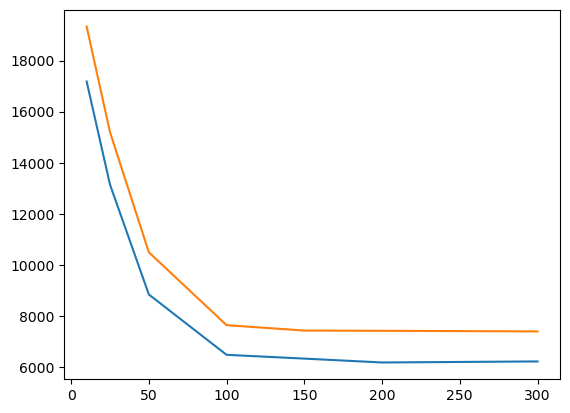

In [36]:
plt.plot(epochs_trial,training_loss, label='Training Losses')
plt.plot(epochs_trial,test_loss, label='Test Losses')

## 3. Example 2: ANN with ECFP and Molecular Weight data.

Used same ANN structure as Example 1

In [37]:
def get_model_example2():
    model = Sequential()
    model.add(Dense(32,input_shape=(129,),activation='relu'))
    model.add(Dense(3,activation='relu'))

    model.compile(loss='mse',optimizer='adam')
    return model

In [38]:
X_mol = ECFP_mol_weight.astype(float); y_mol= df[y_cols].astype(float)
X_mol_train, X_mol_test, y_mol_train, y_mol_test = train_test_split(X_mol, y_mol, test_size=0.20)

In [39]:
model_example2 = get_model_example2()
model_example2.fit(X_mol_train,y_mol_train,epochs=150)

Epoch 1/150
148/148 [==============================] - 1s 2ms/step - loss: 215624.2344
Epoch 2/150
148/148 [==============================] - 0s 2ms/step - loss: 201424.3438
Epoch 3/150
148/148 [==============================] - 0s 2ms/step - loss: 173452.1875
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 136035.5469
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 98238.6953
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 66045.0000
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 42051.5039
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 28436.2852
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 22145.0059
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 19430.1621
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 18152.4043
Epoch 12/150
148/148 [==========================

148/148 [==============================] - 0s 2ms/step - loss: 3377.6001
Epoch 96/150
148/148 [==============================] - 0s 2ms/step - loss: 3365.9382
Epoch 97/150
148/148 [==============================] - 0s 2ms/step - loss: 3354.6794
Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 3346.0300
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3337.7847
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3327.5337
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3325.1838
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3317.9971
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3310.2644
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3304.6340
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 3301.0288
Epoch 106/150
148/148 [==============================] - 0s 2

In [40]:
model_example2.evaluate(X_mol_test,y_mol_test)

37/37 [==============================] - 0s 2ms/step - loss: 3074.4792


3074.479248046875

##### Adding the molecular weight seems to have helped performance by a significant margin!

Try Different Numbers of Epochs (graphing out testing set loss)

In [41]:
epochs_mol = [10,25,50,100,150,250,300,350,400,500,600,700]

In [42]:
test_loss = []
predictions_mol = []

for epoch in epochs_mol:
    model=get_model_example2()
    model.fit(X_mol_train,y_mol_train,epochs=epoch)
    evaluation = model.evaluate(X_mol_test,y_mol_test)
    predictions = model.predict(X_mol_test)
    
    test_loss.append(evaluation)
    predictions_mol.append(predictions)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 215803.2500
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 201283.0781
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 174073.6719
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 139175.3906
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 102722.2734
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 71297.7969
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 47557.4766
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 32716.2266
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 24877.4922
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 19149.4922
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 216172.7031
Epoch 2/25
148/148 [==============================] - 0s 2ms

148/148 [==============================] - 0s 2ms/step - loss: 21029.6992
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 18926.8809
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 17853.5703
Epoch 12/100
148/148 [==============================] - 0s 3ms/step - loss: 17202.4531
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 16731.3984
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 16341.7139
Epoch 15/100
148/148 [==============================] - 0s 3ms/step - loss: 15983.4219
Epoch 16/100
148/148 [==============================] - 0s 3ms/step - loss: 15652.3750
Epoch 17/100
148/148 [==============================] - 0s 3ms/step - loss: 15338.6504
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 15036.5947
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 14744.4980
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 170121.8750
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 131923.8750
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 94151.2031
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 63160.6719
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 41809.8320
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 29385.6211
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 23062.6816
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 20059.8691
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 18565.0352
Epoch 12/150
148/148 [==============================] - 0s 3ms/step - loss: 17711.9941
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 17153.4609
Epoch 14/150
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 3326.1719
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3319.5073
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3312.8191
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3302.1960
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3302.5742
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3292.3582
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3286.1941
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 3280.5969
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 3279.8425
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 3271.6821
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 3269.9336
Epoch 109/150
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 9705.6846
Epoch 42/250
148/148 [==============================] - 0s 2ms/step - loss: 9487.5049
Epoch 43/250
148/148 [==============================] - 0s 2ms/step - loss: 9270.1309
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 9044.1182
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 8824.2793
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 8593.2275
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 8367.6885
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 8143.3677
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 7920.5044
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 7705.6670
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 7488.3330
Epoch 52/250
148/148 [==============================] - 0s 2ms/step

Epoch 136/250
148/148 [==============================] - 0s 2ms/step - loss: 3226.4751
Epoch 137/250
148/148 [==============================] - 0s 2ms/step - loss: 3223.4651
Epoch 138/250
148/148 [==============================] - 0s 3ms/step - loss: 3223.0278
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3226.1882
Epoch 140/250
148/148 [==============================] - 0s 3ms/step - loss: 3220.8723
Epoch 141/250
148/148 [==============================] - 0s 3ms/step - loss: 3221.9534
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3217.1912
Epoch 143/250
148/148 [==============================] - 0s 3ms/step - loss: 3217.7461
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3219.8020
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3214.8569
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 3213.4734
Epoch 147/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 3117.2495
Epoch 231/250
148/148 [==============================] - 0s 2ms/step - loss: 3114.1777
Epoch 232/250
148/148 [==============================] - 0s 2ms/step - loss: 3112.9895
Epoch 233/250
148/148 [==============================] - 0s 2ms/step - loss: 3110.6963
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 3108.8281
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 3108.3511
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 3110.6050
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 3106.0496
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 3106.9434
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 3104.4783
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 3101.2397
Epoch 241/250
148/148 [==============================] - 

Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 4197.3286
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 4114.7285
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 4035.5183
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 3968.1580
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3901.9512
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3842.1492
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3789.0703
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3740.2458
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3692.1296
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3650.1919
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3612.9568
Epoch 85/300
148/148 [==============================] 

148/148 [==============================] - 0s 2ms/step - loss: 3215.1030
Epoch 169/300
148/148 [==============================] - 0s 2ms/step - loss: 3211.9980
Epoch 170/300
148/148 [==============================] - 0s 2ms/step - loss: 3213.7371
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3215.5173
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3212.5254
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 3211.1580
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3211.5688
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 3212.1152
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 3210.4111
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 3213.1912
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 3208.1445
Epoch 179/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3172.2458
Epoch 263/300
148/148 [==============================] - 0s 2ms/step - loss: 3174.9304
Epoch 264/300
148/148 [==============================] - 0s 2ms/step - loss: 3172.8452
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 3172.9309
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 3171.5740
Epoch 267/300
148/148 [==============================] - 0s 3ms/step - loss: 3172.9187
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 3171.0327
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 3168.7512
Epoch 270/300
148/148 [==============================] - 0s 3ms/step - loss: 3167.1003
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 3171.2190
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 3167.1360
Epoch 273/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6814.0503
Epoch 56/350
148/148 [==============================] - 0s 2ms/step - loss: 6613.7207
Epoch 57/350
148/148 [==============================] - 0s 3ms/step - loss: 6417.2500
Epoch 58/350
148/148 [==============================] - 0s 3ms/step - loss: 6229.4951
Epoch 59/350
148/148 [==============================] - 0s 3ms/step - loss: 6046.8140
Epoch 60/350
148/148 [==============================] - 0s 2ms/step - loss: 5871.7002
Epoch 61/350
148/148 [==============================] - 0s 2ms/step - loss: 5691.3936
Epoch 62/350
148/148 [==============================] - 0s 2ms/step - loss: 5520.0918
Epoch 63/350
148/148 [==============================] - 0s 2ms/step - loss: 5344.9976
Epoch 64/350
148/148 [==============================] - 0s 2ms/step - loss: 5182.1211
Epoch 65/350
148/148 [==============================] - 0s 2ms/step - loss: 5025.3247
Epoch 66/350
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3212.1467
Epoch 150/350
148/148 [==============================] - 0s 2ms/step - loss: 3210.3806
Epoch 151/350
148/148 [==============================] - 0s 2ms/step - loss: 3210.2183
Epoch 152/350
148/148 [==============================] - 0s 2ms/step - loss: 3208.3430
Epoch 153/350
148/148 [==============================] - 0s 2ms/step - loss: 3205.5798
Epoch 154/350
148/148 [==============================] - 0s 2ms/step - loss: 3204.1760
Epoch 155/350
148/148 [==============================] - 0s 2ms/step - loss: 3203.7905
Epoch 156/350
148/148 [==============================] - 0s 2ms/step - loss: 3203.1909
Epoch 157/350
148/148 [==============================] - 0s 2ms/step - loss: 3202.1331
Epoch 158/350
148/148 [==============================] - 0s 2ms/step - loss: 3203.0137
Epoch 159/350
148/148 [==============================] - 0s 2ms/step - loss: 3202.5645
Epoch 160/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3107.6626
Epoch 244/350
148/148 [==============================] - 0s 2ms/step - loss: 3103.9329
Epoch 245/350
148/148 [==============================] - 0s 2ms/step - loss: 3104.9619
Epoch 246/350
148/148 [==============================] - 0s 2ms/step - loss: 3102.7917
Epoch 247/350
148/148 [==============================] - 0s 2ms/step - loss: 3102.1230
Epoch 248/350
148/148 [==============================] - 0s 3ms/step - loss: 3099.4978
Epoch 249/350
148/148 [==============================] - 0s 2ms/step - loss: 3097.7217
Epoch 250/350
148/148 [==============================] - 0s 2ms/step - loss: 3097.3806
Epoch 251/350
148/148 [==============================] - 0s 2ms/step - loss: 3096.8247
Epoch 252/350
148/148 [==============================] - 0s 2ms/step - loss: 3094.5625
Epoch 253/350
148/148 [==============================] - 0s 2ms/step - loss: 3094.2544
Epoch 254/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2979.1699
Epoch 338/350
148/148 [==============================] - 0s 2ms/step - loss: 2978.5552
Epoch 339/350
148/148 [==============================] - 0s 2ms/step - loss: 2975.0867
Epoch 340/350
148/148 [==============================] - 0s 2ms/step - loss: 2973.9033
Epoch 341/350
148/148 [==============================] - 0s 2ms/step - loss: 2971.2622
Epoch 342/350
148/148 [==============================] - 0s 2ms/step - loss: 2972.1333
Epoch 343/350
148/148 [==============================] - 0s 3ms/step - loss: 2971.4121
Epoch 344/350
148/148 [==============================] - 0s 2ms/step - loss: 2971.4861
Epoch 345/350
148/148 [==============================] - 0s 2ms/step - loss: 2971.8711
Epoch 346/350
148/148 [==============================] - 0s 2ms/step - loss: 2967.2412
Epoch 347/350
148/148 [==============================] - 0s 2ms/step - loss: 2964.5088
Epoch 348/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3574.8052
Epoch 82/400
148/148 [==============================] - 0s 2ms/step - loss: 3542.0498
Epoch 83/400
148/148 [==============================] - 0s 2ms/step - loss: 3515.7031
Epoch 84/400
148/148 [==============================] - 0s 2ms/step - loss: 3489.1641
Epoch 85/400
148/148 [==============================] - 0s 2ms/step - loss: 3466.2109
Epoch 86/400
148/148 [==============================] - 0s 2ms/step - loss: 3446.8855
Epoch 87/400
148/148 [==============================] - 0s 2ms/step - loss: 3428.0305
Epoch 88/400
148/148 [==============================] - 0s 2ms/step - loss: 3411.1145
Epoch 89/400
148/148 [==============================] - 0s 2ms/step - loss: 3396.6118
Epoch 90/400
148/148 [==============================] - 0s 2ms/step - loss: 3382.9250
Epoch 91/400
148/148 [==============================] - 0s 2ms/step - loss: 3371.0273
Epoch 92/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3229.9683
Epoch 176/400
148/148 [==============================] - 0s 2ms/step - loss: 3226.0913
Epoch 177/400
148/148 [==============================] - 0s 2ms/step - loss: 3223.7627
Epoch 178/400
148/148 [==============================] - 0s 2ms/step - loss: 3222.7896
Epoch 179/400
148/148 [==============================] - 0s 2ms/step - loss: 3226.6545
Epoch 180/400
148/148 [==============================] - 0s 3ms/step - loss: 3222.6694
Epoch 181/400
148/148 [==============================] - 0s 2ms/step - loss: 3223.7610
Epoch 182/400
148/148 [==============================] - 0s 2ms/step - loss: 3223.2771
Epoch 183/400
148/148 [==============================] - 0s 2ms/step - loss: 3224.2949
Epoch 184/400
148/148 [==============================] - 0s 2ms/step - loss: 3224.1582
Epoch 185/400
148/148 [==============================] - 0s 2ms/step - loss: 3224.8132
Epoch 186/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3208.8862
Epoch 270/400
148/148 [==============================] - 0s 2ms/step - loss: 3206.1021
Epoch 271/400
148/148 [==============================] - 0s 2ms/step - loss: 3208.6172
Epoch 272/400
148/148 [==============================] - 0s 2ms/step - loss: 3207.9666
Epoch 273/400
148/148 [==============================] - 0s 2ms/step - loss: 3207.3115
Epoch 274/400
148/148 [==============================] - 0s 2ms/step - loss: 3208.7832
Epoch 275/400
148/148 [==============================] - 0s 2ms/step - loss: 3205.2778
Epoch 276/400
148/148 [==============================] - 0s 2ms/step - loss: 3208.1531
Epoch 277/400
148/148 [==============================] - 0s 2ms/step - loss: 3210.8374
Epoch 278/400
148/148 [==============================] - 0s 2ms/step - loss: 3206.2620
Epoch 279/400
148/148 [==============================] - 0s 2ms/step - loss: 3207.4622
Epoch 280/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3157.7686
Epoch 364/400
148/148 [==============================] - 0s 2ms/step - loss: 3159.7144
Epoch 365/400
148/148 [==============================] - 0s 2ms/step - loss: 3157.8594
Epoch 366/400
148/148 [==============================] - 0s 2ms/step - loss: 3157.5205
Epoch 367/400
148/148 [==============================] - 0s 2ms/step - loss: 3151.8745
Epoch 368/400
148/148 [==============================] - 0s 2ms/step - loss: 3155.3860
Epoch 369/400
148/148 [==============================] - 0s 2ms/step - loss: 3152.2314
Epoch 370/400
148/148 [==============================] - 0s 2ms/step - loss: 3151.8896
Epoch 371/400
148/148 [==============================] - 0s 2ms/step - loss: 3150.4062
Epoch 372/400
148/148 [==============================] - 0s 2ms/step - loss: 3151.6768
Epoch 373/400
148/148 [==============================] - 0s 2ms/step - loss: 3148.1375
Epoch 374/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6045.7412
Epoch 57/500
148/148 [==============================] - 0s 2ms/step - loss: 5867.3696
Epoch 58/500
148/148 [==============================] - 0s 2ms/step - loss: 5701.1748
Epoch 59/500
148/148 [==============================] - 0s 2ms/step - loss: 5540.7744
Epoch 60/500
148/148 [==============================] - 0s 2ms/step - loss: 5390.1875
Epoch 61/500
148/148 [==============================] - 0s 2ms/step - loss: 5239.8657
Epoch 62/500
148/148 [==============================] - 0s 2ms/step - loss: 5100.8491
Epoch 63/500
148/148 [==============================] - 0s 2ms/step - loss: 4965.0928
Epoch 64/500
148/148 [==============================] - 0s 2ms/step - loss: 4838.7109
Epoch 65/500
148/148 [==============================] - 0s 2ms/step - loss: 4715.4946
Epoch 66/500
148/148 [==============================] - 0s 3ms/step - loss: 4595.9829
Epoch 67/500
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3208.3774
Epoch 151/500
148/148 [==============================] - 0s 2ms/step - loss: 3209.1958
Epoch 152/500
148/148 [==============================] - 0s 2ms/step - loss: 3209.7605
Epoch 153/500
148/148 [==============================] - 0s 2ms/step - loss: 3211.4348
Epoch 154/500
148/148 [==============================] - 0s 2ms/step - loss: 3212.7300
Epoch 155/500
148/148 [==============================] - 0s 2ms/step - loss: 3204.8936
Epoch 156/500
148/148 [==============================] - 0s 2ms/step - loss: 3203.8000
Epoch 157/500
148/148 [==============================] - 0s 2ms/step - loss: 3207.9648
Epoch 158/500
148/148 [==============================] - 0s 2ms/step - loss: 3206.7358
Epoch 159/500
148/148 [==============================] - 0s 2ms/step - loss: 3206.6736
Epoch 160/500
148/148 [==============================] - 0s 2ms/step - loss: 3204.9688
Epoch 161/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3129.0703
Epoch 245/500
148/148 [==============================] - 0s 3ms/step - loss: 3128.2930
Epoch 246/500
148/148 [==============================] - 0s 2ms/step - loss: 3124.4126
Epoch 247/500
148/148 [==============================] - 0s 2ms/step - loss: 3125.2502
Epoch 248/500
148/148 [==============================] - 0s 2ms/step - loss: 3122.6787
Epoch 249/500
148/148 [==============================] - 0s 2ms/step - loss: 3121.9651
Epoch 250/500
148/148 [==============================] - 0s 2ms/step - loss: 3121.0537
Epoch 251/500
148/148 [==============================] - 0s 2ms/step - loss: 3118.4568
Epoch 252/500
148/148 [==============================] - 0s 2ms/step - loss: 3119.8088
Epoch 253/500
148/148 [==============================] - 0s 2ms/step - loss: 3117.3386
Epoch 254/500
148/148 [==============================] - 0s 2ms/step - loss: 3114.8997
Epoch 255/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2980.7295
Epoch 339/500
148/148 [==============================] - 0s 2ms/step - loss: 2978.5325
Epoch 340/500
148/148 [==============================] - 0s 2ms/step - loss: 2977.9045
Epoch 341/500
148/148 [==============================] - 0s 2ms/step - loss: 2975.8364
Epoch 342/500
148/148 [==============================] - 0s 2ms/step - loss: 2973.6089
Epoch 343/500
148/148 [==============================] - 0s 2ms/step - loss: 2973.4268
Epoch 344/500
148/148 [==============================] - 0s 2ms/step - loss: 2972.2212
Epoch 345/500
148/148 [==============================] - 0s 2ms/step - loss: 2969.1978
Epoch 346/500
148/148 [==============================] - 0s 2ms/step - loss: 2967.6328
Epoch 347/500
148/148 [==============================] - 0s 2ms/step - loss: 2967.0962
Epoch 348/500
148/148 [==============================] - 0s 2ms/step - loss: 2968.1802
Epoch 349/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2859.1997
Epoch 433/500
148/148 [==============================] - 0s 2ms/step - loss: 2854.0249
Epoch 434/500
148/148 [==============================] - 0s 2ms/step - loss: 2852.0088
Epoch 435/500
148/148 [==============================] - 0s 2ms/step - loss: 2851.1157
Epoch 436/500
148/148 [==============================] - 0s 2ms/step - loss: 2853.2717
Epoch 437/500
148/148 [==============================] - 0s 2ms/step - loss: 2850.6680
Epoch 438/500
148/148 [==============================] - 0s 2ms/step - loss: 2850.3193
Epoch 439/500
148/148 [==============================] - 0s 2ms/step - loss: 2849.6064
Epoch 440/500
148/148 [==============================] - 0s 2ms/step - loss: 2847.9719
Epoch 441/500
148/148 [==============================] - 0s 2ms/step - loss: 2850.4260
Epoch 442/500
148/148 [==============================] - 0s 2ms/step - loss: 2845.9236
Epoch 443/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 13341.6123
Epoch 26/600
148/148 [==============================] - 0s 2ms/step - loss: 13102.6230
Epoch 27/600
148/148 [==============================] - 0s 2ms/step - loss: 12848.9678
Epoch 28/600
148/148 [==============================] - 0s 2ms/step - loss: 12594.5225
Epoch 29/600
148/148 [==============================] - 0s 2ms/step - loss: 12345.8428
Epoch 30/600
148/148 [==============================] - 0s 2ms/step - loss: 12096.8857
Epoch 31/600
148/148 [==============================] - 0s 2ms/step - loss: 11852.0742
Epoch 32/600
148/148 [==============================] - 0s 3ms/step - loss: 11611.9590
Epoch 33/600
148/148 [==============================] - 0s 2ms/step - loss: 11375.9062
Epoch 34/600
148/148 [==============================] - 0s 2ms/step - loss: 11139.4355
Epoch 35/600
148/148 [==============================] - 0s 2ms/step - loss: 10890.2803
Epoch 36/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3255.5295
Epoch 121/600
148/148 [==============================] - 0s 2ms/step - loss: 3254.1042
Epoch 122/600
148/148 [==============================] - 0s 2ms/step - loss: 3251.9375
Epoch 123/600
148/148 [==============================] - 0s 2ms/step - loss: 3252.6262
Epoch 124/600
148/148 [==============================] - 0s 2ms/step - loss: 3251.5906
Epoch 125/600
148/148 [==============================] - 0s 2ms/step - loss: 3252.7771
Epoch 126/600
148/148 [==============================] - 0s 2ms/step - loss: 3249.8862
Epoch 127/600
148/148 [==============================] - 0s 2ms/step - loss: 3250.0676
Epoch 128/600
148/148 [==============================] - 0s 2ms/step - loss: 3248.4302
Epoch 129/600
148/148 [==============================] - 0s 2ms/step - loss: 3248.3972
Epoch 130/600
148/148 [==============================] - 0s 2ms/step - loss: 3247.8276
Epoch 131/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3213.1519
Epoch 215/600
148/148 [==============================] - 0s 2ms/step - loss: 3214.7798
Epoch 216/600
148/148 [==============================] - 0s 2ms/step - loss: 3216.5029
Epoch 217/600
148/148 [==============================] - 0s 2ms/step - loss: 3219.8069
Epoch 218/600
148/148 [==============================] - 0s 2ms/step - loss: 3215.8381
Epoch 219/600
148/148 [==============================] - 0s 2ms/step - loss: 3214.1150
Epoch 220/600
148/148 [==============================] - 0s 2ms/step - loss: 3215.7332
Epoch 221/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.7305
Epoch 222/600
148/148 [==============================] - 0s 2ms/step - loss: 3211.0063
Epoch 223/600
148/148 [==============================] - 0s 2ms/step - loss: 3211.9045
Epoch 224/600
148/148 [==============================] - 0s 2ms/step - loss: 3212.2195
Epoch 225/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3170.1167
Epoch 309/600
148/148 [==============================] - 0s 2ms/step - loss: 3170.7239
Epoch 310/600
148/148 [==============================] - 0s 2ms/step - loss: 3169.7563
Epoch 311/600
148/148 [==============================] - 0s 2ms/step - loss: 3166.7034
Epoch 312/600
148/148 [==============================] - 0s 2ms/step - loss: 3165.3267
Epoch 313/600
148/148 [==============================] - 0s 2ms/step - loss: 3163.3374
Epoch 314/600
148/148 [==============================] - 0s 2ms/step - loss: 3164.0378
Epoch 315/600
148/148 [==============================] - 0s 2ms/step - loss: 3164.6809
Epoch 316/600
148/148 [==============================] - 0s 2ms/step - loss: 3161.9639
Epoch 317/600
148/148 [==============================] - 0s 2ms/step - loss: 3163.4600
Epoch 318/600
148/148 [==============================] - 0s 2ms/step - loss: 3162.1465
Epoch 319/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3092.3044
Epoch 403/600
148/148 [==============================] - 0s 2ms/step - loss: 3095.1162
Epoch 404/600
148/148 [==============================] - 0s 2ms/step - loss: 3091.5552
Epoch 405/600
148/148 [==============================] - 0s 2ms/step - loss: 3092.6599
Epoch 406/600
148/148 [==============================] - 0s 2ms/step - loss: 3090.9272
Epoch 407/600
148/148 [==============================] - 0s 2ms/step - loss: 3087.2048
Epoch 408/600
148/148 [==============================] - 0s 2ms/step - loss: 3089.7988
Epoch 409/600
148/148 [==============================] - 0s 2ms/step - loss: 3083.3008
Epoch 410/600
148/148 [==============================] - 0s 2ms/step - loss: 3085.4250
Epoch 411/600
148/148 [==============================] - 0s 2ms/step - loss: 3083.2905
Epoch 412/600
148/148 [==============================] - 0s 2ms/step - loss: 3082.5845
Epoch 413/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3015.7512
Epoch 497/600
148/148 [==============================] - 0s 2ms/step - loss: 3015.3381
Epoch 498/600
148/148 [==============================] - 0s 2ms/step - loss: 3015.9688
Epoch 499/600
148/148 [==============================] - 0s 2ms/step - loss: 3012.0457
Epoch 500/600
148/148 [==============================] - 0s 2ms/step - loss: 3010.8059
Epoch 501/600
148/148 [==============================] - 0s 2ms/step - loss: 3015.0962
Epoch 502/600
148/148 [==============================] - 0s 2ms/step - loss: 3010.3660
Epoch 503/600
148/148 [==============================] - 0s 2ms/step - loss: 3011.5522
Epoch 504/600
148/148 [==============================] - 0s 2ms/step - loss: 3009.7493
Epoch 505/600
148/148 [==============================] - 0s 2ms/step - loss: 3009.0078
Epoch 506/600
148/148 [==============================] - 0s 2ms/step - loss: 3016.2275
Epoch 507/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2958.6450
Epoch 591/600
148/148 [==============================] - 0s 2ms/step - loss: 2954.7874
Epoch 592/600
148/148 [==============================] - 0s 2ms/step - loss: 2953.3425
Epoch 593/600
148/148 [==============================] - 0s 2ms/step - loss: 2954.3301
Epoch 594/600
148/148 [==============================] - 0s 2ms/step - loss: 2953.1790
Epoch 595/600
148/148 [==============================] - 0s 2ms/step - loss: 2953.8867
Epoch 596/600
148/148 [==============================] - 0s 2ms/step - loss: 2953.5442
Epoch 597/600
148/148 [==============================] - 0s 2ms/step - loss: 2950.9343
Epoch 598/600
148/148 [==============================] - 0s 2ms/step - loss: 2951.4304
Epoch 599/600
148/148 [==============================] - 0s 2ms/step - loss: 2952.8503
Epoch 600/600
37/37 [==============================] - 0s 1ms/step - loss: 2944.0811
Epoch 1/700
148/148 [==============================] - 1s 8

148/148 [==============================] - 0s 2ms/step - loss: 3451.5938
Epoch 85/700
148/148 [==============================] - 0s 2ms/step - loss: 3429.1763
Epoch 86/700
148/148 [==============================] - 0s 2ms/step - loss: 3408.2334
Epoch 87/700
148/148 [==============================] - 0s 2ms/step - loss: 3390.6277
Epoch 88/700
148/148 [==============================] - 1s 4ms/step - loss: 3378.7571
Epoch 89/700
148/148 [==============================] - 0s 2ms/step - loss: 3362.9307
Epoch 90/700
148/148 [==============================] - 0s 2ms/step - loss: 3353.6116
Epoch 91/700
148/148 [==============================] - 0s 2ms/step - loss: 3339.2688
Epoch 92/700
148/148 [==============================] - 0s 2ms/step - loss: 3328.4556
Epoch 93/700
148/148 [==============================] - 0s 2ms/step - loss: 3321.2173
Epoch 94/700
148/148 [==============================] - 0s 2ms/step - loss: 3311.3784
Epoch 95/700
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3180.8855
Epoch 179/700
148/148 [==============================] - 0s 2ms/step - loss: 3179.3699
Epoch 180/700
148/148 [==============================] - 0s 2ms/step - loss: 3178.6636
Epoch 181/700
148/148 [==============================] - 0s 2ms/step - loss: 3178.9900
Epoch 182/700
148/148 [==============================] - 0s 2ms/step - loss: 3176.9062
Epoch 183/700
148/148 [==============================] - 0s 2ms/step - loss: 3176.9094
Epoch 184/700
148/148 [==============================] - 0s 2ms/step - loss: 3173.0974
Epoch 185/700
148/148 [==============================] - 0s 2ms/step - loss: 3181.8418
Epoch 186/700
148/148 [==============================] - 0s 2ms/step - loss: 3178.6162
Epoch 187/700
148/148 [==============================] - 0s 2ms/step - loss: 3176.0698
Epoch 188/700
148/148 [==============================] - 0s 2ms/step - loss: 3179.0562
Epoch 189/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3121.4438
Epoch 273/700
148/148 [==============================] - 0s 2ms/step - loss: 3124.1885
Epoch 274/700
148/148 [==============================] - 0s 2ms/step - loss: 3121.0496
Epoch 275/700
148/148 [==============================] - 0s 2ms/step - loss: 3118.6970
Epoch 276/700
148/148 [==============================] - 0s 2ms/step - loss: 3121.7009
Epoch 277/700
148/148 [==============================] - 0s 3ms/step - loss: 3118.0662
Epoch 278/700
148/148 [==============================] - 0s 2ms/step - loss: 3117.9241
Epoch 279/700
148/148 [==============================] - 0s 2ms/step - loss: 3117.5515
Epoch 280/700
148/148 [==============================] - 0s 2ms/step - loss: 3112.4114
Epoch 281/700
148/148 [==============================] - 0s 2ms/step - loss: 3116.1450
Epoch 282/700
148/148 [==============================] - 0s 2ms/step - loss: 3112.5237
Epoch 283/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3006.1179
Epoch 367/700
148/148 [==============================] - 0s 2ms/step - loss: 3007.6770
Epoch 368/700
148/148 [==============================] - 0s 2ms/step - loss: 3003.9238
Epoch 369/700
148/148 [==============================] - 0s 2ms/step - loss: 3003.7334
Epoch 370/700
148/148 [==============================] - 0s 2ms/step - loss: 2999.1938
Epoch 371/700
148/148 [==============================] - 0s 2ms/step - loss: 2998.9363
Epoch 372/700
148/148 [==============================] - 0s 2ms/step - loss: 2999.6472
Epoch 373/700
148/148 [==============================] - 0s 2ms/step - loss: 2998.1001
Epoch 374/700
148/148 [==============================] - 0s 1ms/step - loss: 2996.0447
Epoch 375/700
148/148 [==============================] - 0s 1ms/step - loss: 2994.6816
Epoch 376/700
148/148 [==============================] - 0s 1ms/step - loss: 2995.6665
Epoch 377/700
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 2889.2583
Epoch 461/700
148/148 [==============================] - 0s 1ms/step - loss: 2894.2468
Epoch 462/700
148/148 [==============================] - 0s 1ms/step - loss: 2891.1924
Epoch 463/700
148/148 [==============================] - 0s 1ms/step - loss: 2885.1658
Epoch 464/700
148/148 [==============================] - 0s 1ms/step - loss: 2890.0317
Epoch 465/700
148/148 [==============================] - 0s 2ms/step - loss: 2882.9949
Epoch 466/700
148/148 [==============================] - 0s 2ms/step - loss: 2882.8950
Epoch 467/700
148/148 [==============================] - 0s 1ms/step - loss: 2881.6433
Epoch 468/700
148/148 [==============================] - 0s 1ms/step - loss: 2878.6692
Epoch 469/700
148/148 [==============================] - 0s 1ms/step - loss: 2882.2061
Epoch 470/700
148/148 [==============================] - 0s 1ms/step - loss: 2876.8271
Epoch 471/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2801.9302
Epoch 555/700
148/148 [==============================] - 0s 2ms/step - loss: 2801.7380
Epoch 556/700
148/148 [==============================] - 0s 2ms/step - loss: 2801.7913
Epoch 557/700
148/148 [==============================] - 0s 2ms/step - loss: 2800.0698
Epoch 558/700
148/148 [==============================] - 0s 1ms/step - loss: 2798.0310
Epoch 559/700
148/148 [==============================] - 0s 1ms/step - loss: 2797.8906
Epoch 560/700
148/148 [==============================] - 0s 2ms/step - loss: 2797.0198
Epoch 561/700
148/148 [==============================] - 0s 1ms/step - loss: 2795.1116
Epoch 562/700
148/148 [==============================] - 0s 1ms/step - loss: 2794.5759
Epoch 563/700
148/148 [==============================] - 0s 2ms/step - loss: 2793.1851
Epoch 564/700
148/148 [==============================] - 0s 1ms/step - loss: 2791.9431
Epoch 565/700
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 2740.2390
Epoch 649/700
148/148 [==============================] - 0s 1ms/step - loss: 2738.7705
Epoch 650/700
148/148 [==============================] - 0s 2ms/step - loss: 2738.0024
Epoch 651/700
148/148 [==============================] - 0s 1ms/step - loss: 2737.2100
Epoch 652/700
148/148 [==============================] - 0s 1ms/step - loss: 2736.8311
Epoch 653/700
148/148 [==============================] - 0s 1ms/step - loss: 2737.0928
Epoch 654/700
148/148 [==============================] - 0s 1ms/step - loss: 2738.1978
Epoch 655/700
148/148 [==============================] - 0s 1ms/step - loss: 2733.2830
Epoch 656/700
148/148 [==============================] - 0s 2ms/step - loss: 2736.1348
Epoch 657/700
148/148 [==============================] - 0s 2ms/step - loss: 2733.5278
Epoch 658/700
148/148 [==============================] - 0s 2ms/step - loss: 2732.4944
Epoch 659/700
148/148 [==============================] - 

In [43]:
test_loss

[19149.4921875,
 11950.806640625,
 6974.3857421875,
 3168.38525390625,
 3055.052978515625,
 2990.6494140625,
 3024.4921875,
 2942.642822265625,
 3002.475830078125,
 2874.10009765625,
 2944.0810546875,
 2952.214111328125]

In [44]:
predictions

array([[6.5914398e+02, 4.3530077e-01, 4.7141925e+02],
       [6.2861334e+02, 4.0159851e-01, 4.4791238e+02],
       [6.6094110e+02, 4.8416677e-01, 4.8540503e+02],
       ...,
       [8.5050220e+02, 6.6802216e-01, 6.4970685e+02],
       [5.5317206e+02, 2.4811274e-01, 3.6160037e+02],
       [5.8230640e+02, 3.3128613e-01, 3.9815506e+02]], dtype=float32)

In [45]:
perc_errors_mol = np.abs((y_mol_test-predictions)/y_mol_test)*100

In [46]:
perc_errors_mol.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,8.295228,31.423663,9.691693
std,10.529731,44.402383,11.749771
min,0.001283,0.004592,0.000656
25%,2.483808,9.746863,2.950095
50%,5.557524,21.291687,6.366838
75%,10.836573,38.659242,12.203742
max,161.678805,562.140176,143.236386


In [47]:
predictions_mol_df = pd.DataFrame(predictions, columns = y_cols)
predictions_mol_df.head()

,critical temperature (K),acentric factor,boiling point (K)
0,659.143982,0.435301,471.419250
1,628.613342,0.401599,447.912384
2,660.941101,0.484167,485.405029
3,544.436035,0.270115,364.649750
4,835.381226,0.618172,629.811462


In [48]:
y_mol_test.head()

,critical temperature (K),acentric factor,boiling point (K)
1600,644.85,0.404,465.15
3673,697.15,0.437,478.15
608,608.00,0.868,462.66
1022,514.83,0.342,350.00
97,804.01,0.839,613.15


Since this model is not effective for Acentric factor, train a multi-output regression network for Critical Temperature and Boiling Point. Variables for this model type will be labeled with "final"

## 4. Multi-output ANN (Critical and Boiling temperatures only)

In [49]:
y_cols_final = ['critical temperature (K)','boiling point (K)']

In [50]:
X_final = ECFP_mol_weight.astype(float); y_final= df[y_cols_final].astype(float)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.20)

In [51]:
def get_model(layer_dims,activations,n_input=129,loss_f='mse'):
    """Returns a compiled model using input layer_dims & activations. layer_dims = [512,256,2]
    Will return a layer with 2 hidden layers with 512,256 units and an output layer
    with 2 units"""
    model = Sequential()
    #First hidden layer
    model.add(Dense(layer_dims[0],input_shape=(n_input,),activation=activations[0]))
    
    #Other hidden layers
    for i in range(1,len(layer_dims)-1):
        model.add(Dense(layer_dims[i],activation=activations[i]))

    model.add(Dense(layer_dims[-1],activation=activations[-1]))

    model.compile(loss=loss_f,optimizer='adam')
    return model

In [52]:
layer_dims = [32,2]
activations = ['relu','relu']
trial_epochs = [10,25,50,75,100,150,200,300,400,500,600,750]
test_loss_final = []
for epoch in trial_epochs:  
    model = get_model(layer_dims,activations)
    model.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model.evaluate(X_final_test,y_final_test)
    
    test_loss_final.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 325546.6562
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 302598.6562
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 253741.2812
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 189642.3438
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 129056.3359
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 83035.3438
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 54309.8789
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 39275.9102
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 32154.5625
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 26377.6465
Epoch 1/25
148/148 [==============================] - 1s 789us/step - loss: 325273.0938
Epoch 2/25
148/148 [==============================] - 0s 9

148/148 [==============================] - 0s 2ms/step - loss: 48595.3555
Epoch 9/75
148/148 [==============================] - 0s 3ms/step - loss: 37022.3594
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 31315.4336
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 28447.7891
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 26883.7246
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 25914.5859
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 25221.3750
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 24646.9180
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 24135.4570
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 23659.2676
Epoch 18/75
148/148 [==============================] - 0s 2ms/step - loss: 23210.1855
Epoch 19/75
148/148 [==============================] - 0s 2ms/step 

148/148 [==============================] - 0s 2ms/step - loss: 19394.9746
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 19054.9766
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 18718.7070
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 18391.7812
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 18066.4570
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 17745.7754
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 17423.9570
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 17111.9043
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 16802.0234
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 16493.7871
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 16181.9746
Epoch 38/100
148/148 [==============================] - 

Epoch 21/150
148/148 [==============================] - 0s 1ms/step - loss: 20868.3770
Epoch 22/150
148/148 [==============================] - 0s 1ms/step - loss: 20436.0254
Epoch 23/150
148/148 [==============================] - 0s 1ms/step - loss: 20009.8301
Epoch 24/150
148/148 [==============================] - 0s 1ms/step - loss: 19602.9180
Epoch 25/150
148/148 [==============================] - 0s 1ms/step - loss: 19204.6914
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 18823.6133
Epoch 27/150
148/148 [==============================] - 0s 1ms/step - loss: 18441.0684
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 18073.4688
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 17714.7363
Epoch 30/150
148/148 [==============================] - 0s 2ms/step - loss: 17363.8477
Epoch 31/150
148/148 [==============================] - 0s 2ms/step - loss: 17012.5215
Epoch 32/150
148/148 [=====================

148/148 [==============================] - 0s 2ms/step - loss: 4746.6758
Epoch 116/150
148/148 [==============================] - 0s 1ms/step - loss: 4744.3682
Epoch 117/150
148/148 [==============================] - 0s 1ms/step - loss: 4744.3237
Epoch 118/150
148/148 [==============================] - 0s 1ms/step - loss: 4737.8071
Epoch 119/150
148/148 [==============================] - 0s 1ms/step - loss: 4736.2026
Epoch 120/150
148/148 [==============================] - 0s 1ms/step - loss: 4733.7729
Epoch 121/150
148/148 [==============================] - 0s 1ms/step - loss: 4730.9780
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4726.8887
Epoch 123/150
148/148 [==============================] - 0s 1ms/step - loss: 4727.6133
Epoch 124/150
148/148 [==============================] - 0s 1ms/step - loss: 4725.5767
Epoch 125/150
148/148 [==============================] - 0s 2ms/step - loss: 4720.1841
Epoch 126/150
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 10222.3555
Epoch 59/200
148/148 [==============================] - 0s 1ms/step - loss: 9947.0098
Epoch 60/200
148/148 [==============================] - 0s 1ms/step - loss: 9686.4053
Epoch 61/200
148/148 [==============================] - 0s 1ms/step - loss: 9430.3389
Epoch 62/200
148/148 [==============================] - 0s 1ms/step - loss: 9177.7578
Epoch 63/200
148/148 [==============================] - 0s 1ms/step - loss: 8934.4248
Epoch 64/200
148/148 [==============================] - 0s 1ms/step - loss: 8696.2598
Epoch 65/200
148/148 [==============================] - 0s 1ms/step - loss: 8476.0400
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 8258.2207
Epoch 67/200
148/148 [==============================] - 0s 1ms/step - loss: 8047.1680
Epoch 68/200
148/148 [==============================] - 0s 1ms/step - loss: 7844.4863
Epoch 69/200
148/148 [==============================] - 0s 1ms/ste

148/148 [==============================] - 0s 2ms/step - loss: 4761.1978
Epoch 153/200
148/148 [==============================] - 0s 1ms/step - loss: 4755.2041
Epoch 154/200
148/148 [==============================] - 0s 1ms/step - loss: 4756.8813
Epoch 155/200
148/148 [==============================] - 0s 1ms/step - loss: 4755.3613
Epoch 156/200
148/148 [==============================] - 0s 1ms/step - loss: 4752.3027
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4752.8511
Epoch 158/200
148/148 [==============================] - 0s 1ms/step - loss: 4750.4956
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4753.3867
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4746.4448
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4751.5693
Epoch 162/200
148/148 [==============================] - 0s 1ms/step - loss: 4748.2827
Epoch 163/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 13199.3555
Epoch 46/300
148/148 [==============================] - 0s 2ms/step - loss: 12914.8115
Epoch 47/300
148/148 [==============================] - 0s 1ms/step - loss: 12617.4639
Epoch 48/300
148/148 [==============================] - 0s 1ms/step - loss: 12317.4111
Epoch 49/300
148/148 [==============================] - 0s 1ms/step - loss: 12019.1045
Epoch 50/300
148/148 [==============================] - 0s 2ms/step - loss: 11723.7715
Epoch 51/300
148/148 [==============================] - 0s 1ms/step - loss: 11431.0117
Epoch 52/300
148/148 [==============================] - 0s 1ms/step - loss: 11138.1797
Epoch 53/300
148/148 [==============================] - 0s 1ms/step - loss: 10841.4717
Epoch 54/300
148/148 [==============================] - 0s 2ms/step - loss: 10540.3818
Epoch 55/300
148/148 [==============================] - 0s 2ms/step - loss: 10232.2002
Epoch 56/300
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 4753.8667
Epoch 140/300
148/148 [==============================] - 0s 1ms/step - loss: 4752.4053
Epoch 141/300
148/148 [==============================] - 0s 2ms/step - loss: 4753.2393
Epoch 142/300
148/148 [==============================] - 0s 2ms/step - loss: 4750.4790
Epoch 143/300
148/148 [==============================] - 0s 2ms/step - loss: 4749.2993
Epoch 144/300
148/148 [==============================] - 0s 1ms/step - loss: 4748.9663
Epoch 145/300
148/148 [==============================] - 0s 2ms/step - loss: 4741.3511
Epoch 146/300
148/148 [==============================] - 0s 2ms/step - loss: 4747.6680
Epoch 147/300
148/148 [==============================] - 0s 2ms/step - loss: 4747.5615
Epoch 148/300
148/148 [==============================] - 0s 2ms/step - loss: 4743.9951
Epoch 149/300
148/148 [==============================] - 0s 2ms/step - loss: 4743.3218
Epoch 150/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4714.0371
Epoch 234/300
148/148 [==============================] - 0s 2ms/step - loss: 4717.0688
Epoch 235/300
148/148 [==============================] - 0s 2ms/step - loss: 4714.4155
Epoch 236/300
148/148 [==============================] - 0s 2ms/step - loss: 4715.8711
Epoch 237/300
148/148 [==============================] - 0s 1ms/step - loss: 4714.3936
Epoch 238/300
148/148 [==============================] - 0s 1ms/step - loss: 4718.1807
Epoch 239/300
148/148 [==============================] - 0s 1ms/step - loss: 4715.1133
Epoch 240/300
148/148 [==============================] - 0s 2ms/step - loss: 4716.1357
Epoch 241/300
148/148 [==============================] - 0s 1ms/step - loss: 4710.8828
Epoch 242/300
148/148 [==============================] - 0s 2ms/step - loss: 4716.0444
Epoch 243/300
148/148 [==============================] - 0s 2ms/step - loss: 4712.5034
Epoch 244/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 18191.0176
Epoch 27/400
148/148 [==============================] - 0s 1ms/step - loss: 17768.8496
Epoch 28/400
148/148 [==============================] - 0s 1ms/step - loss: 17335.9121
Epoch 29/400
148/148 [==============================] - 0s 1ms/step - loss: 16916.9922
Epoch 30/400
148/148 [==============================] - 0s 1ms/step - loss: 16507.8125
Epoch 31/400
148/148 [==============================] - 0s 2ms/step - loss: 16101.2881
Epoch 32/400
148/148 [==============================] - 0s 2ms/step - loss: 15709.8643
Epoch 33/400
148/148 [==============================] - 0s 2ms/step - loss: 15319.2656
Epoch 34/400
148/148 [==============================] - 0s 2ms/step - loss: 14936.2188
Epoch 35/400
148/148 [==============================] - 0s 2ms/step - loss: 14563.9170
Epoch 36/400
148/148 [==============================] - 0s 2ms/step - loss: 14197.9785
Epoch 37/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4743.2466
Epoch 121/400
148/148 [==============================] - 0s 2ms/step - loss: 4750.8428
Epoch 122/400
148/148 [==============================] - 0s 2ms/step - loss: 4744.0913
Epoch 123/400
148/148 [==============================] - 0s 1ms/step - loss: 4741.4243
Epoch 124/400
148/148 [==============================] - 0s 2ms/step - loss: 4742.3809
Epoch 125/400
148/148 [==============================] - 0s 1ms/step - loss: 4735.2485
Epoch 126/400
148/148 [==============================] - 0s 1ms/step - loss: 4735.4121
Epoch 127/400
148/148 [==============================] - 0s 1ms/step - loss: 4738.1426
Epoch 128/400
148/148 [==============================] - 0s 2ms/step - loss: 4731.2197
Epoch 129/400
148/148 [==============================] - 0s 2ms/step - loss: 4733.9922
Epoch 130/400
148/148 [==============================] - 0s 2ms/step - loss: 4731.4497
Epoch 131/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4659.7104
Epoch 215/400
148/148 [==============================] - 0s 1ms/step - loss: 4655.0762
Epoch 216/400
148/148 [==============================] - 0s 2ms/step - loss: 4658.5381
Epoch 217/400
148/148 [==============================] - 0s 1ms/step - loss: 4653.6309
Epoch 218/400
148/148 [==============================] - 0s 2ms/step - loss: 4653.8110
Epoch 219/400
148/148 [==============================] - 0s 2ms/step - loss: 4648.8350
Epoch 220/400
148/148 [==============================] - 0s 2ms/step - loss: 4649.0815
Epoch 221/400
148/148 [==============================] - 0s 2ms/step - loss: 4648.9219
Epoch 222/400
148/148 [==============================] - 0s 2ms/step - loss: 4648.2710
Epoch 223/400
148/148 [==============================] - 0s 2ms/step - loss: 4648.2129
Epoch 224/400
148/148 [==============================] - 0s 1ms/step - loss: 4648.6611
Epoch 225/400
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 4513.6909
Epoch 309/400
148/148 [==============================] - 0s 2ms/step - loss: 4508.5986
Epoch 310/400
148/148 [==============================] - 0s 1ms/step - loss: 4505.3242
Epoch 311/400
148/148 [==============================] - 0s 1ms/step - loss: 4507.0864
Epoch 312/400
148/148 [==============================] - 0s 1ms/step - loss: 4502.7358
Epoch 313/400
148/148 [==============================] - 0s 2ms/step - loss: 4497.9644
Epoch 314/400
148/148 [==============================] - 0s 2ms/step - loss: 4497.8501
Epoch 315/400
148/148 [==============================] - 0s 1ms/step - loss: 4496.7217
Epoch 316/400
148/148 [==============================] - 0s 2ms/step - loss: 4492.7720
Epoch 317/400
148/148 [==============================] - 0s 1ms/step - loss: 4496.9951
Epoch 318/400
148/148 [==============================] - 0s 2ms/step - loss: 4490.9453
Epoch 319/400
148/148 [==============================] - 

148/148 [==============================] - 1s 1ms/step - loss: 324932.4688
Epoch 2/500
148/148 [==============================] - 0s 1ms/step - loss: 303274.0625
Epoch 3/500
148/148 [==============================] - 0s 1ms/step - loss: 260130.8750
Epoch 4/500
148/148 [==============================] - 0s 1ms/step - loss: 203297.6875
Epoch 5/500
148/148 [==============================] - 0s 1ms/step - loss: 144679.1719
Epoch 6/500
148/148 [==============================] - 0s 1ms/step - loss: 96118.9219
Epoch 7/500
148/148 [==============================] - 0s 1ms/step - loss: 62428.8555
Epoch 8/500
148/148 [==============================] - 0s 1ms/step - loss: 42505.9688
Epoch 9/500
148/148 [==============================] - 0s 1ms/step - loss: 33082.1953
Epoch 10/500
148/148 [==============================] - 0s 1ms/step - loss: 28882.4941
Epoch 11/500
148/148 [==============================] - 0s 2ms/step - loss: 26903.1914
Epoch 12/500
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 2ms/step - loss: 4886.8013
Epoch 96/500
148/148 [==============================] - 0s 2ms/step - loss: 4876.3188
Epoch 97/500
148/148 [==============================] - 0s 2ms/step - loss: 4864.1626
Epoch 98/500
148/148 [==============================] - 0s 2ms/step - loss: 4856.0952
Epoch 99/500
148/148 [==============================] - 0s 2ms/step - loss: 4846.2803
Epoch 100/500
148/148 [==============================] - 0s 2ms/step - loss: 4838.9697
Epoch 101/500
148/148 [==============================] - 0s 2ms/step - loss: 4830.8364
Epoch 102/500
148/148 [==============================] - 0s 2ms/step - loss: 4829.2300
Epoch 103/500
148/148 [==============================] - 0s 2ms/step - loss: 4826.4146
Epoch 104/500
148/148 [==============================] - 0s 2ms/step - loss: 4825.6465
Epoch 105/500
148/148 [==============================] - 0s 2ms/step - loss: 4817.0742
Epoch 106/500
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 4717.8564
Epoch 190/500
148/148 [==============================] - 0s 2ms/step - loss: 4718.9048
Epoch 191/500
148/148 [==============================] - 0s 2ms/step - loss: 4716.0146
Epoch 192/500
148/148 [==============================] - 0s 2ms/step - loss: 4719.9414
Epoch 193/500
148/148 [==============================] - 0s 2ms/step - loss: 4720.0298
Epoch 194/500
148/148 [==============================] - 0s 2ms/step - loss: 4713.5249
Epoch 195/500
148/148 [==============================] - 0s 2ms/step - loss: 4718.6919
Epoch 196/500
148/148 [==============================] - 0s 2ms/step - loss: 4714.4731
Epoch 197/500
148/148 [==============================] - 0s 2ms/step - loss: 4712.5303
Epoch 198/500
148/148 [==============================] - 0s 2ms/step - loss: 4713.6675
Epoch 199/500
148/148 [==============================] - 0s 2ms/step - loss: 4715.0430
Epoch 200/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4675.8804
Epoch 284/500
148/148 [==============================] - 0s 2ms/step - loss: 4678.0840
Epoch 285/500
148/148 [==============================] - 0s 2ms/step - loss: 4668.6826
Epoch 286/500
148/148 [==============================] - 0s 2ms/step - loss: 4677.2925
Epoch 287/500
148/148 [==============================] - 0s 2ms/step - loss: 4675.0898
Epoch 288/500
148/148 [==============================] - 0s 2ms/step - loss: 4672.3750
Epoch 289/500
148/148 [==============================] - 0s 2ms/step - loss: 4671.4995
Epoch 290/500
148/148 [==============================] - 0s 2ms/step - loss: 4675.2817
Epoch 291/500
148/148 [==============================] - 0s 2ms/step - loss: 4672.7832
Epoch 292/500
148/148 [==============================] - 0s 2ms/step - loss: 4666.8306
Epoch 293/500
148/148 [==============================] - 0s 2ms/step - loss: 4670.8936
Epoch 294/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4581.0039
Epoch 378/500
148/148 [==============================] - 0s 2ms/step - loss: 4580.2388
Epoch 379/500
148/148 [==============================] - 0s 2ms/step - loss: 4583.6040
Epoch 380/500
148/148 [==============================] - 0s 2ms/step - loss: 4574.7354
Epoch 381/500
148/148 [==============================] - 0s 2ms/step - loss: 4575.1973
Epoch 382/500
148/148 [==============================] - 0s 2ms/step - loss: 4574.7349
Epoch 383/500
148/148 [==============================] - 0s 2ms/step - loss: 4572.0166
Epoch 384/500
148/148 [==============================] - 0s 2ms/step - loss: 4568.5854
Epoch 385/500
148/148 [==============================] - 0s 2ms/step - loss: 4568.3672
Epoch 386/500
148/148 [==============================] - 0s 2ms/step - loss: 4566.9092
Epoch 387/500
148/148 [==============================] - 0s 2ms/step - loss: 4567.9736
Epoch 388/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4408.0859
Epoch 472/500
148/148 [==============================] - 0s 2ms/step - loss: 4410.8765
Epoch 473/500
148/148 [==============================] - 0s 2ms/step - loss: 4406.8379
Epoch 474/500
148/148 [==============================] - 0s 2ms/step - loss: 4404.7642
Epoch 475/500
148/148 [==============================] - 0s 2ms/step - loss: 4402.8096
Epoch 476/500
148/148 [==============================] - 0s 2ms/step - loss: 4401.1113
Epoch 477/500
148/148 [==============================] - 1s 3ms/step - loss: 4400.0591
Epoch 478/500
148/148 [==============================] - 0s 2ms/step - loss: 4401.8252
Epoch 479/500
148/148 [==============================] - 0s 2ms/step - loss: 4397.0068
Epoch 480/500
148/148 [==============================] - 0s 2ms/step - loss: 4395.7456
Epoch 481/500
148/148 [==============================] - 0s 2ms/step - loss: 4389.7861
Epoch 482/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6997.1157
Epoch 65/600
148/148 [==============================] - 0s 2ms/step - loss: 6822.3623
Epoch 66/600
148/148 [==============================] - 0s 2ms/step - loss: 6654.8950
Epoch 67/600
148/148 [==============================] - 0s 2ms/step - loss: 6503.0381
Epoch 68/600
148/148 [==============================] - 0s 2ms/step - loss: 6356.5933
Epoch 69/600
148/148 [==============================] - 0s 3ms/step - loss: 6223.3594
Epoch 70/600
148/148 [==============================] - 0s 2ms/step - loss: 6097.6460
Epoch 71/600
148/148 [==============================] - 0s 2ms/step - loss: 5981.8223
Epoch 72/600
148/148 [==============================] - 0s 2ms/step - loss: 5873.1143
Epoch 73/600
148/148 [==============================] - 0s 2ms/step - loss: 5774.1318
Epoch 74/600
148/148 [==============================] - 0s 2ms/step - loss: 5681.7495
Epoch 75/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4715.3809
Epoch 159/600
148/148 [==============================] - 0s 2ms/step - loss: 4715.6904
Epoch 160/600
148/148 [==============================] - 0s 2ms/step - loss: 4718.4829
Epoch 161/600
148/148 [==============================] - 0s 2ms/step - loss: 4708.7417
Epoch 162/600
148/148 [==============================] - 0s 2ms/step - loss: 4717.4365
Epoch 163/600
148/148 [==============================] - 0s 2ms/step - loss: 4710.1172
Epoch 164/600
148/148 [==============================] - 0s 2ms/step - loss: 4708.9023
Epoch 165/600
148/148 [==============================] - 0s 2ms/step - loss: 4709.3975
Epoch 166/600
148/148 [==============================] - 0s 2ms/step - loss: 4706.9854
Epoch 167/600
148/148 [==============================] - 0s 2ms/step - loss: 4708.4854
Epoch 168/600
148/148 [==============================] - 0s 2ms/step - loss: 4707.0620
Epoch 169/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4646.5146
Epoch 253/600
148/148 [==============================] - 0s 2ms/step - loss: 4642.0366
Epoch 254/600
148/148 [==============================] - 0s 2ms/step - loss: 4641.5674
Epoch 255/600
148/148 [==============================] - 0s 2ms/step - loss: 4634.5000
Epoch 256/600
148/148 [==============================] - 0s 2ms/step - loss: 4631.5073
Epoch 257/600
148/148 [==============================] - 0s 2ms/step - loss: 4631.0508
Epoch 258/600
148/148 [==============================] - 0s 2ms/step - loss: 4635.8701
Epoch 259/600
148/148 [==============================] - 0s 2ms/step - loss: 4634.5015
Epoch 260/600
148/148 [==============================] - 0s 2ms/step - loss: 4631.8979
Epoch 261/600
148/148 [==============================] - 0s 2ms/step - loss: 4629.2373
Epoch 262/600
148/148 [==============================] - 0s 2ms/step - loss: 4628.1895
Epoch 263/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4499.6089
Epoch 347/600
148/148 [==============================] - 0s 2ms/step - loss: 4495.0068
Epoch 348/600
148/148 [==============================] - 0s 2ms/step - loss: 4490.7104
Epoch 349/600
148/148 [==============================] - 0s 2ms/step - loss: 4490.8340
Epoch 350/600
148/148 [==============================] - 0s 2ms/step - loss: 4488.5254
Epoch 351/600
148/148 [==============================] - 0s 2ms/step - loss: 4485.5513
Epoch 352/600
148/148 [==============================] - 0s 2ms/step - loss: 4486.6982
Epoch 353/600
148/148 [==============================] - 0s 2ms/step - loss: 4480.3135
Epoch 354/600
148/148 [==============================] - 0s 2ms/step - loss: 4481.1650
Epoch 355/600
148/148 [==============================] - 0s 2ms/step - loss: 4479.3589
Epoch 356/600
148/148 [==============================] - 0s 2ms/step - loss: 4476.4385
Epoch 357/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4341.8862
Epoch 441/600
148/148 [==============================] - 0s 2ms/step - loss: 4334.3989
Epoch 442/600
148/148 [==============================] - 0s 2ms/step - loss: 4335.8672
Epoch 443/600
148/148 [==============================] - 0s 2ms/step - loss: 4333.4971
Epoch 444/600
148/148 [==============================] - 0s 2ms/step - loss: 4335.1201
Epoch 445/600
148/148 [==============================] - 0s 2ms/step - loss: 4337.0239
Epoch 446/600
148/148 [==============================] - 0s 2ms/step - loss: 4330.1128
Epoch 447/600
148/148 [==============================] - 0s 2ms/step - loss: 4330.1992
Epoch 448/600
148/148 [==============================] - 0s 2ms/step - loss: 4326.8813
Epoch 449/600
148/148 [==============================] - 0s 2ms/step - loss: 4323.7690
Epoch 450/600
148/148 [==============================] - 0s 2ms/step - loss: 4324.9150
Epoch 451/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4221.1313
Epoch 535/600
148/148 [==============================] - 0s 2ms/step - loss: 4214.3564
Epoch 536/600
148/148 [==============================] - 0s 2ms/step - loss: 4214.8389
Epoch 537/600
148/148 [==============================] - 0s 2ms/step - loss: 4211.5308
Epoch 538/600
148/148 [==============================] - 0s 2ms/step - loss: 4210.1177
Epoch 539/600
148/148 [==============================] - 0s 2ms/step - loss: 4210.0718
Epoch 540/600
148/148 [==============================] - 0s 2ms/step - loss: 4211.5688
Epoch 541/600
148/148 [==============================] - 0s 2ms/step - loss: 4210.6445
Epoch 542/600
148/148 [==============================] - 0s 2ms/step - loss: 4206.5649
Epoch 543/600
148/148 [==============================] - 0s 2ms/step - loss: 4204.7759
Epoch 544/600
148/148 [==============================] - 0s 2ms/step - loss: 4203.8823
Epoch 545/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 19573.4688
Epoch 28/750
148/148 [==============================] - 0s 2ms/step - loss: 19238.5918
Epoch 29/750
148/148 [==============================] - 0s 2ms/step - loss: 18906.2051
Epoch 30/750
148/148 [==============================] - 0s 2ms/step - loss: 18577.5195
Epoch 31/750
148/148 [==============================] - 0s 2ms/step - loss: 18258.0879
Epoch 32/750
148/148 [==============================] - 0s 2ms/step - loss: 17938.9004
Epoch 33/750
148/148 [==============================] - 0s 2ms/step - loss: 17621.3398
Epoch 34/750
148/148 [==============================] - 0s 2ms/step - loss: 17318.7754
Epoch 35/750
148/148 [==============================] - 0s 2ms/step - loss: 17002.3418
Epoch 36/750
148/148 [==============================] - 0s 2ms/step - loss: 16667.7129
Epoch 37/750
148/148 [==============================] - 0s 2ms/step - loss: 16317.5049
Epoch 38/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4797.1074
Epoch 122/750
148/148 [==============================] - 0s 2ms/step - loss: 4791.4604
Epoch 123/750
148/148 [==============================] - 0s 2ms/step - loss: 4789.1143
Epoch 124/750
148/148 [==============================] - 0s 2ms/step - loss: 4788.7612
Epoch 125/750
148/148 [==============================] - 0s 2ms/step - loss: 4785.4238
Epoch 126/750
148/148 [==============================] - 0s 2ms/step - loss: 4790.3188
Epoch 127/750
148/148 [==============================] - 0s 2ms/step - loss: 4784.9956
Epoch 128/750
148/148 [==============================] - 0s 2ms/step - loss: 4782.6733
Epoch 129/750
148/148 [==============================] - 0s 2ms/step - loss: 4779.6309
Epoch 130/750
148/148 [==============================] - 0s 2ms/step - loss: 4773.8027
Epoch 131/750
148/148 [==============================] - 0s 2ms/step - loss: 4778.6138
Epoch 132/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4733.3608
Epoch 216/750
148/148 [==============================] - 0s 2ms/step - loss: 4733.7598
Epoch 217/750
148/148 [==============================] - 0s 2ms/step - loss: 4731.0430
Epoch 218/750
148/148 [==============================] - 0s 2ms/step - loss: 4733.2461
Epoch 219/750
148/148 [==============================] - 0s 2ms/step - loss: 4740.0073
Epoch 220/750
148/148 [==============================] - 0s 2ms/step - loss: 4729.8579
Epoch 221/750
148/148 [==============================] - 0s 2ms/step - loss: 4736.3101
Epoch 222/750
148/148 [==============================] - 0s 2ms/step - loss: 4731.4995
Epoch 223/750
148/148 [==============================] - 0s 2ms/step - loss: 4728.9614
Epoch 224/750
148/148 [==============================] - 0s 2ms/step - loss: 4730.7451
Epoch 225/750
148/148 [==============================] - 0s 2ms/step - loss: 4732.0205
Epoch 226/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4710.7646
Epoch 310/750
148/148 [==============================] - 0s 2ms/step - loss: 4713.1030
Epoch 311/750
148/148 [==============================] - 0s 2ms/step - loss: 4712.6514
Epoch 312/750
148/148 [==============================] - 0s 2ms/step - loss: 4714.6309
Epoch 313/750
148/148 [==============================] - 0s 2ms/step - loss: 4709.0981
Epoch 314/750
148/148 [==============================] - 0s 2ms/step - loss: 4713.0146
Epoch 315/750
148/148 [==============================] - 0s 2ms/step - loss: 4709.6724
Epoch 316/750
148/148 [==============================] - 0s 2ms/step - loss: 4709.1953
Epoch 317/750
148/148 [==============================] - 0s 2ms/step - loss: 4709.6138
Epoch 318/750
148/148 [==============================] - 0s 2ms/step - loss: 4710.3906
Epoch 319/750
148/148 [==============================] - 0s 2ms/step - loss: 4708.3721
Epoch 320/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4675.2388
Epoch 404/750
148/148 [==============================] - 0s 2ms/step - loss: 4671.7979
Epoch 405/750
148/148 [==============================] - 0s 2ms/step - loss: 4669.3037
Epoch 406/750
148/148 [==============================] - 0s 2ms/step - loss: 4671.0137
Epoch 407/750
148/148 [==============================] - 0s 2ms/step - loss: 4669.6436
Epoch 408/750
148/148 [==============================] - 0s 2ms/step - loss: 4668.9702
Epoch 409/750
148/148 [==============================] - 0s 2ms/step - loss: 4665.5786
Epoch 410/750
148/148 [==============================] - 0s 2ms/step - loss: 4666.5034
Epoch 411/750
148/148 [==============================] - 0s 2ms/step - loss: 4666.1294
Epoch 412/750
148/148 [==============================] - 0s 2ms/step - loss: 4665.9023
Epoch 413/750
148/148 [==============================] - 0s 2ms/step - loss: 4665.6812
Epoch 414/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4560.8706
Epoch 498/750
148/148 [==============================] - 0s 2ms/step - loss: 4565.1880
Epoch 499/750
148/148 [==============================] - 0s 2ms/step - loss: 4559.9023
Epoch 500/750
148/148 [==============================] - 0s 2ms/step - loss: 4560.8838
Epoch 501/750
148/148 [==============================] - 0s 2ms/step - loss: 4561.8584
Epoch 502/750
148/148 [==============================] - 0s 2ms/step - loss: 4559.3477
Epoch 503/750
148/148 [==============================] - 0s 2ms/step - loss: 4556.3564
Epoch 504/750
148/148 [==============================] - 0s 2ms/step - loss: 4551.6309
Epoch 505/750
148/148 [==============================] - 0s 2ms/step - loss: 4556.7480
Epoch 506/750
148/148 [==============================] - 0s 2ms/step - loss: 4551.7339
Epoch 507/750
148/148 [==============================] - 0s 2ms/step - loss: 4551.2422
Epoch 508/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4461.6514
Epoch 592/750
148/148 [==============================] - 0s 2ms/step - loss: 4456.6519
Epoch 593/750
148/148 [==============================] - 0s 2ms/step - loss: 4458.4858
Epoch 594/750
148/148 [==============================] - 0s 2ms/step - loss: 4455.0591
Epoch 595/750
148/148 [==============================] - 0s 2ms/step - loss: 4455.3940
Epoch 596/750
148/148 [==============================] - 0s 2ms/step - loss: 4451.2354
Epoch 597/750
148/148 [==============================] - 0s 2ms/step - loss: 4452.4888
Epoch 598/750
148/148 [==============================] - 0s 2ms/step - loss: 4450.7183
Epoch 599/750
148/148 [==============================] - 0s 2ms/step - loss: 4449.4214
Epoch 600/750
148/148 [==============================] - 0s 2ms/step - loss: 4451.7676
Epoch 601/750
148/148 [==============================] - 0s 2ms/step - loss: 4451.2798
Epoch 602/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4352.1626
Epoch 686/750
148/148 [==============================] - 0s 2ms/step - loss: 4349.5439
Epoch 687/750
148/148 [==============================] - 0s 2ms/step - loss: 4348.4707
Epoch 688/750
148/148 [==============================] - 0s 2ms/step - loss: 4352.2261
Epoch 689/750
148/148 [==============================] - 0s 2ms/step - loss: 4345.3906
Epoch 690/750
148/148 [==============================] - 0s 2ms/step - loss: 4345.2510
Epoch 691/750
148/148 [==============================] - 0s 2ms/step - loss: 4342.4136
Epoch 692/750
148/148 [==============================] - 0s 1ms/step - loss: 4342.7749
Epoch 693/750
148/148 [==============================] - 0s 1ms/step - loss: 4338.9468
Epoch 694/750
148/148 [==============================] - 0s 2ms/step - loss: 4340.4233
Epoch 695/750
148/148 [==============================] - 0s 2ms/step - loss: 4340.7944
Epoch 696/750
148/148 [==============================] - 

In [53]:
test_loss_final

[26377.646484375,
 19076.7421875,
 11666.3828125,
 7113.8154296875,
 5119.33935546875,
 4981.85498046875,
 4985.45263671875,
 4955.8212890625,
 4857.53662109375,
 4799.572265625,
 4792.96923828125,
 4766.3232421875]

Even with increasing epochs, the test set loss seems to be constantly decreasing. Maybe a deeper neural network (or layers with more units) can be used. 

In [54]:
#Use epoch = 750
predictions_temps = model.predict(X_final_test)

In [55]:
perc_errors_temps = np.abs((y_final_test-predictions_temps)/y_final_test)*100

In [56]:
perc_errors_temps.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.522023,9.989067
std,11.844059,13.355915
min,0.015314,0.001088
25%,2.323614,2.619384
50%,5.125954,6.045097
75%,11.041157,12.850075
max,163.045653,167.631125


Try with a 3 layer network network

In [57]:
layer_dims2=[64,32,2]
activations2 = ['relu','relu','relu']
trial_epochs2 = [10,25,50,100,200,300,400]
test_loss_final2 = []
for epoch in trial_epochs2:  
    model2 = get_model(layer_dims2,activations2)
    model2.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model2.evaluate(X_final_test,y_final_test)
    
    test_loss_final2.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 289390.1875
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 53400.4570
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 24283.3301
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 21615.4238
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 19427.8652
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 17465.1758
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 15659.0762
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 14030.1924
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 12514.2314
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 10630.4102
Epoch 1/25
148/148 [==============================] - 1s 940us/step - loss: 281786.5938
Epoch 2/25
148/148 [==============================] - 0s 1ms/s

148/148 [==============================] - 0s 2ms/step - loss: 14408.5576
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 13159.2461
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 11975.8555
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 10824.4824
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 9772.2119
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 8810.7725
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 7947.0693
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 7219.2261
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 6591.1299
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 6106.7656
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 5750.9126
Epoch 20/100
148/148 [==============================] - 0s 2ms/

148/148 [==============================] - 0s 1ms/step - loss: 28142.0195
Epoch 4/200
148/148 [==============================] - 0s 1ms/step - loss: 23108.4883
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 20992.1113
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 19326.4629
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 17847.2051
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 16573.5312
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 15335.2510
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 14170.4229
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 13031.4961
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 11968.3799
Epoch 13/200
148/148 [==============================] - 0s 2ms/step - loss: 10932.5254
Epoch 14/200
148/148 [==============================] - 0s 2ms

148/148 [==============================] - 0s 2ms/step - loss: 4632.5884
Epoch 99/200
148/148 [==============================] - 0s 2ms/step - loss: 4626.5972
Epoch 100/200
148/148 [==============================] - 0s 2ms/step - loss: 4640.5977
Epoch 101/200
148/148 [==============================] - 0s 2ms/step - loss: 4618.2651
Epoch 102/200
148/148 [==============================] - 0s 2ms/step - loss: 4642.6582
Epoch 103/200
148/148 [==============================] - 0s 2ms/step - loss: 4617.8198
Epoch 104/200
148/148 [==============================] - 0s 2ms/step - loss: 4617.0898
Epoch 105/200
148/148 [==============================] - 0s 2ms/step - loss: 4606.6738
Epoch 106/200
148/148 [==============================] - 0s 2ms/step - loss: 4622.8433
Epoch 107/200
148/148 [==============================] - 0s 2ms/step - loss: 4620.5396
Epoch 108/200
148/148 [==============================] - 0s 2ms/step - loss: 4612.5601
Epoch 109/200
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 4476.5742
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 4484.4150
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 4479.3999
Epoch 195/200
148/148 [==============================] - 0s 2ms/step - loss: 4479.2563
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 4462.4463
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 4471.4473
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 4459.5010
Epoch 199/200
148/148 [==============================] - 0s 2ms/step - loss: 4466.7544
Epoch 200/200
37/37 [==============================] - 0s 1ms/step - loss: 4999.3809
Epoch 1/300
148/148 [==============================] - 1s 1ms/step - loss: 299251.7500
Epoch 2/300
148/148 [==============================] - 0s 1ms/step - loss: 142305.3906
Epoch 3/300
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 113597.2656
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 113604.8281
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 113588.1641
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 113587.6641
Epoch 88/300
148/148 [==============================] - 0s 2ms/step - loss: 113589.5234
Epoch 89/300
148/148 [==============================] - 0s 2ms/step - loss: 113576.1797
Epoch 90/300
148/148 [==============================] - 0s 2ms/step - loss: 113577.5391
Epoch 91/300
148/148 [==============================] - 0s 2ms/step - loss: 113587.2500
Epoch 92/300
148/148 [==============================] - 0s 2ms/step - loss: 113580.5781
Epoch 93/300
148/148 [==============================] - 0s 2ms/step - loss: 113579.0781
Epoch 94/300
148/148 [==============================] - 0s 2ms/step - loss: 113572.3125
Epoch 95/300
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 113407.6406
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 113403.8203
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 113400.4062
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 113391.1250
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 113398.3828
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 113414.4141
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 113391.5234
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 113391.1875
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 113386.3047
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 113387.6406
Epoch 186/300
148/148 [==============================] - 0s 2ms/step - loss: 113392.6641
Epoch 187/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113275.1484
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 113270.4375
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 113267.8750
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 113265.3828
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 113279.1406
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 113259.8125
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 113274.7812
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 113268.2812
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 113279.4609
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 113269.7188
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 113266.4375
Epoch 279/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 4739.7515
Epoch 62/400
148/148 [==============================] - 0s 2ms/step - loss: 4742.2676
Epoch 63/400
148/148 [==============================] - 0s 2ms/step - loss: 4730.3140
Epoch 64/400
148/148 [==============================] - 0s 2ms/step - loss: 4731.4116
Epoch 65/400
148/148 [==============================] - 0s 2ms/step - loss: 4731.6997
Epoch 66/400
148/148 [==============================] - 0s 2ms/step - loss: 4730.6748
Epoch 67/400
148/148 [==============================] - 0s 2ms/step - loss: 4729.7036
Epoch 68/400
148/148 [==============================] - 0s 2ms/step - loss: 4744.5537
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 4716.5293
Epoch 70/400
148/148 [==============================] - 0s 2ms/step - loss: 4723.9834
Epoch 71/400
148/148 [==============================] - 0s 2ms/step - loss: 4710.9912
Epoch 72/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4520.2466
Epoch 156/400
148/148 [==============================] - 0s 2ms/step - loss: 4510.1489
Epoch 157/400
148/148 [==============================] - 0s 2ms/step - loss: 4520.9956
Epoch 158/400
148/148 [==============================] - 0s 2ms/step - loss: 4525.0259
Epoch 159/400
148/148 [==============================] - 0s 2ms/step - loss: 4515.3569
Epoch 160/400
148/148 [==============================] - 0s 2ms/step - loss: 4510.0996
Epoch 161/400
148/148 [==============================] - 0s 2ms/step - loss: 4519.8584
Epoch 162/400
148/148 [==============================] - 0s 2ms/step - loss: 4527.2559
Epoch 163/400
148/148 [==============================] - 0s 2ms/step - loss: 4493.5654
Epoch 164/400
148/148 [==============================] - 0s 2ms/step - loss: 4488.0269
Epoch 165/400
148/148 [==============================] - 0s 2ms/step - loss: 4498.0527
Epoch 166/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4317.7681
Epoch 250/400
148/148 [==============================] - 0s 2ms/step - loss: 4306.8965
Epoch 251/400
148/148 [==============================] - 0s 2ms/step - loss: 4311.9536
Epoch 252/400
148/148 [==============================] - 0s 2ms/step - loss: 4309.9297
Epoch 253/400
148/148 [==============================] - 0s 2ms/step - loss: 4295.2544
Epoch 254/400
148/148 [==============================] - 0s 2ms/step - loss: 4289.8418
Epoch 255/400
148/148 [==============================] - 0s 2ms/step - loss: 4299.0464
Epoch 256/400
148/148 [==============================] - 0s 2ms/step - loss: 4298.1914
Epoch 257/400
148/148 [==============================] - 0s 2ms/step - loss: 4302.1445
Epoch 258/400
148/148 [==============================] - 0s 2ms/step - loss: 4298.9824
Epoch 259/400
148/148 [==============================] - 0s 2ms/step - loss: 4289.2285
Epoch 260/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4136.9658
Epoch 344/400
148/148 [==============================] - 0s 2ms/step - loss: 4156.4038
Epoch 345/400
148/148 [==============================] - 0s 2ms/step - loss: 4141.4995
Epoch 346/400
148/148 [==============================] - 0s 2ms/step - loss: 4139.3428
Epoch 347/400
148/148 [==============================] - 0s 2ms/step - loss: 4146.6616
Epoch 348/400
148/148 [==============================] - 0s 2ms/step - loss: 4165.6279
Epoch 349/400
148/148 [==============================] - 0s 2ms/step - loss: 4133.6011
Epoch 350/400
148/148 [==============================] - 0s 2ms/step - loss: 4136.6860
Epoch 351/400
148/148 [==============================] - 0s 2ms/step - loss: 4144.0649
Epoch 352/400
148/148 [==============================] - 0s 2ms/step - loss: 4127.2197
Epoch 353/400
148/148 [==============================] - 0s 2ms/step - loss: 4147.0776
Epoch 354/400
148/148 [==============================] - 

In [58]:
test_loss_final2

[10630.41015625,
 5079.9345703125,
 5123.03515625,
 5119.58203125,
 4999.380859375,
 113052.6796875,
 5181.23876953125]

At a very low number of epochs, the neural network seems to have the lowest test set loss. Experiment with lower complexity models:

In [59]:
layer_dims3=[32,16,2]
trial_epochs3 = [10,25,50,100,200,300,400]
activations3 = ['relu','relu','relu']
test_loss_final3 = []
for epoch in trial_epochs3:  
    model3 = get_model(layer_dims3,activations3)
    model3.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model3.evaluate(X_final_test,y_final_test)
    
    test_loss_final3.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 863us/step - loss: 314310.6875
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 156893.2656
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 32209.2363
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 24943.2012
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 22676.9473
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 20664.3555
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 19008.2383
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 17579.2012
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 16291.0439
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 14333.8477
Epoch 1/25
148/148 [==============================] - 1s 1ms/step - loss: 314452.1250
Epoch 2/25
148/148 [==============================] - 0s 1ms/

148/148 [==============================] - 0s 2ms/step - loss: 16545.8398
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 15380.3799
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 14286.8916
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 13226.4629
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 12216.6123
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 11260.0244
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 10391.7070
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 9507.0996
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 8675.2363
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 7923.6890
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 7281.7017
Epoch 20/100
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 1ms/step - loss: 151735.5938
Epoch 4/200
148/148 [==============================] - 0s 1ms/step - loss: 127980.0000
Epoch 5/200
148/148 [==============================] - 0s 1ms/step - loss: 126655.8750
Epoch 6/200
148/148 [==============================] - 0s 1ms/step - loss: 125728.2969
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 124956.4609
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 124260.5391
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 123582.0625
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 122947.7031
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 122348.0156
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 121794.8359
Epoch 13/200
148/148 [==============================] - 0s 2ms/step - loss: 121269.1406
Epoch 14/200
148/148 [=============================

148/148 [==============================] - 0s 2ms/step - loss: 113626.4844
Epoch 97/200
148/148 [==============================] - 0s 2ms/step - loss: 113620.2344
Epoch 98/200
148/148 [==============================] - 0s 2ms/step - loss: 113636.0781
Epoch 99/200
148/148 [==============================] - 0s 2ms/step - loss: 113625.0391
Epoch 100/200
148/148 [==============================] - 0s 2ms/step - loss: 113622.8828
Epoch 101/200
148/148 [==============================] - 0s 2ms/step - loss: 113628.9453
Epoch 102/200
148/148 [==============================] - 0s 2ms/step - loss: 113619.1016
Epoch 103/200
148/148 [==============================] - 0s 2ms/step - loss: 113622.2344
Epoch 104/200
148/148 [==============================] - 0s 2ms/step - loss: 113617.9219
Epoch 105/200
148/148 [==============================] - 0s 2ms/step - loss: 113619.6641
Epoch 106/200
148/148 [==============================] - 0s 2ms/step - loss: 113617.7969
Epoch 107/200
148/148 [===============

148/148 [==============================] - 0s 2ms/step - loss: 113550.8594
Epoch 189/200
148/148 [==============================] - 0s 2ms/step - loss: 113550.5781
Epoch 190/200
148/148 [==============================] - 0s 2ms/step - loss: 113549.8750
Epoch 191/200
148/148 [==============================] - 0s 2ms/step - loss: 113555.5156
Epoch 192/200
148/148 [==============================] - 0s 2ms/step - loss: 113547.1328
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 113545.8984
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 113542.1953
Epoch 195/200
148/148 [==============================] - 0s 2ms/step - loss: 113538.7734
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 113545.6484
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 113541.9766
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 113543.3047
Epoch 199/200
148/148 [============

Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 4785.4531
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 4766.0679
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 4768.2515
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 4756.0913
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 4771.6812
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 4785.0933
Epoch 88/300
148/148 [==============================] - 0s 2ms/step - loss: 4754.7100
Epoch 89/300
148/148 [==============================] - 0s 2ms/step - loss: 4767.7563
Epoch 90/300
148/148 [==============================] - 0s 2ms/step - loss: 4751.9189
Epoch 91/300
148/148 [==============================] - 0s 2ms/step - loss: 4746.7324
Epoch 92/300
148/148 [==============================] - 0s 2ms/step - loss: 4754.3169
Epoch 93/300
148/148 [==============================] 

148/148 [==============================] - 0s 2ms/step - loss: 4676.5981
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 4670.5840
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 4675.5952
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 4675.8989
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 4665.2764
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 4675.1064
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 4667.3062
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 4666.1616
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 4656.2227
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 4663.8794
Epoch 186/300
148/148 [==============================] - 0s 2ms/step - loss: 4652.3647
Epoch 187/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4577.1782
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 4574.1079
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 4563.7329
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 4575.8604
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 4561.9927
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 4560.5371
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 4575.6704
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 4566.9399
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 4559.7900
Epoch 279/300
148/148 [==============================] - 0s 2ms/step - loss: 4564.6606
Epoch 280/300
148/148 [==============================] - 0s 2ms/step - loss: 4568.3887
Epoch 281/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4671.7134
Epoch 65/400
148/148 [==============================] - 0s 2ms/step - loss: 4667.0239
Epoch 66/400
148/148 [==============================] - 0s 2ms/step - loss: 4651.4756
Epoch 67/400
148/148 [==============================] - 0s 2ms/step - loss: 4653.9053
Epoch 68/400
148/148 [==============================] - 0s 2ms/step - loss: 4657.4585
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 4646.2529
Epoch 70/400
148/148 [==============================] - 0s 2ms/step - loss: 4625.5732
Epoch 71/400
148/148 [==============================] - 0s 2ms/step - loss: 4638.9443
Epoch 72/400
148/148 [==============================] - 0s 2ms/step - loss: 4633.4277
Epoch 73/400
148/148 [==============================] - 0s 2ms/step - loss: 4623.4600
Epoch 74/400
148/148 [==============================] - 0s 2ms/step - loss: 4618.0825
Epoch 75/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4363.7520
Epoch 159/400
148/148 [==============================] - 0s 2ms/step - loss: 4377.2339
Epoch 160/400
148/148 [==============================] - 0s 2ms/step - loss: 4372.6187
Epoch 161/400
148/148 [==============================] - 0s 2ms/step - loss: 4371.6841
Epoch 162/400
148/148 [==============================] - 0s 2ms/step - loss: 4354.0806
Epoch 163/400
148/148 [==============================] - 0s 2ms/step - loss: 4359.0679
Epoch 164/400
148/148 [==============================] - 0s 2ms/step - loss: 4342.7954
Epoch 165/400
148/148 [==============================] - 0s 2ms/step - loss: 4348.0688
Epoch 166/400
148/148 [==============================] - 0s 2ms/step - loss: 4345.5508
Epoch 167/400
148/148 [==============================] - 0s 2ms/step - loss: 4334.5054
Epoch 168/400
148/148 [==============================] - 0s 2ms/step - loss: 4326.0942
Epoch 169/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4031.6975
Epoch 253/400
148/148 [==============================] - 0s 2ms/step - loss: 4028.1111
Epoch 254/400
148/148 [==============================] - 0s 2ms/step - loss: 4015.9636
Epoch 255/400
148/148 [==============================] - 0s 2ms/step - loss: 4020.4060
Epoch 256/400
148/148 [==============================] - 0s 2ms/step - loss: 4012.1423
Epoch 257/400
148/148 [==============================] - 0s 2ms/step - loss: 4005.7830
Epoch 258/400
148/148 [==============================] - 0s 2ms/step - loss: 4011.3613
Epoch 259/400
148/148 [==============================] - 0s 2ms/step - loss: 4011.4580
Epoch 260/400
148/148 [==============================] - 0s 2ms/step - loss: 4005.4160
Epoch 261/400
148/148 [==============================] - 0s 2ms/step - loss: 4016.1660
Epoch 262/400
148/148 [==============================] - 0s 2ms/step - loss: 3991.1157
Epoch 263/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3843.3547
Epoch 347/400
148/148 [==============================] - 0s 2ms/step - loss: 3846.2920
Epoch 348/400
148/148 [==============================] - 0s 2ms/step - loss: 3840.2637
Epoch 349/400
148/148 [==============================] - 0s 2ms/step - loss: 3840.1729
Epoch 350/400
148/148 [==============================] - 0s 2ms/step - loss: 3839.2861
Epoch 351/400
148/148 [==============================] - 0s 2ms/step - loss: 3829.5139
Epoch 352/400
148/148 [==============================] - 0s 2ms/step - loss: 3836.9233
Epoch 353/400
148/148 [==============================] - 0s 2ms/step - loss: 3844.1130
Epoch 354/400
148/148 [==============================] - 0s 2ms/step - loss: 3851.5105
Epoch 355/400
148/148 [==============================] - 0s 2ms/step - loss: 3846.0293
Epoch 356/400
148/148 [==============================] - 0s 2ms/step - loss: 3832.2288
Epoch 357/400
148/148 [==============================] - 

In [60]:
test_loss_final3

[14333.84765625,
 5660.3125,
 5061.3369140625,
 5055.3076171875,
 112906.578125,
 5065.30615234375,
 5058.9501953125]

In [61]:
model = get_model(layer_dims3, activations3)
model.fit(X_final_train,y_final_train,epochs = 50)
model.evaluate(X_final_test,y_final_test)

Epoch 1/50
148/148 [==============================] - 1s 874us/step - loss: 322880.7812
Epoch 2/50
148/148 [==============================] - 0s 1ms/step - loss: 263018.4375
Epoch 3/50
148/148 [==============================] - 0s 1ms/step - loss: 228168.3281
Epoch 4/50
148/148 [==============================] - 0s 1ms/step - loss: 227046.8594
Epoch 5/50
148/148 [==============================] - 0s 1ms/step - loss: 226383.6406
Epoch 6/50
148/148 [==============================] - 0s 2ms/step - loss: 225851.9844
Epoch 7/50
148/148 [==============================] - 0s 2ms/step - loss: 225384.5625
Epoch 8/50
148/148 [==============================] - 0s 2ms/step - loss: 224974.0156
Epoch 9/50
148/148 [==============================] - 0s 2ms/step - loss: 224585.7969
Epoch 10/50
148/148 [==============================] - 0s 2ms/step - loss: 224211.2656
Epoch 11/50
148/148 [==============================] - 0s 2ms/step - loss: 223858.7656
Epoch 12/50
148/148 [=============================

217914.3125

In [62]:
predictions_temps2 = model.predict(X_final_test)

In [63]:
perc_errors_temps2 =  np.abs((y_final_test-predictions_temps2)/y_final_test)*100

In [64]:
perc_errors_temps2.describe()

,critical temperature (K),boiling point (K)
count,1180.0,1180.000000
mean,100.0,10.413981
std,0.0,14.197120
min,100.0,0.003717
25%,100.0,2.587666
50%,100.0,6.263766
75%,100.0,12.845786
max,100.0,195.323818


In [65]:
layer_dims4=[64,2]
trial_epochs4 = [10,25,50,75,100,150,200,250,300]
activations4 = ['relu','relu']
test_loss_final4 = []
evaluation_best = 100000

for epoch in trial_epochs4:  
    model4 = get_model(layer_dims4,activations4)
    model4.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model4.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model4 = model4
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final4.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 322636.4688
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 279914.5312
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 202466.2812
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 123521.4922
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 68137.0156
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 41051.9609
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 30954.4785
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 27374.7246
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 25847.9902
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 23585.9336

 updated Model! Loss 23585.93359375 

Epoch 1/25
148/148 [==============================] - 1s 909us/step - loss: 320830.4688
Epoch 2/25
148/148 [

148/148 [==============================] - 0s 1ms/step - loss: 29474.5254
Epoch 8/75
148/148 [==============================] - 0s 1ms/step - loss: 26776.1699
Epoch 9/75
148/148 [==============================] - 0s 1ms/step - loss: 25420.5117
Epoch 10/75
148/148 [==============================] - 0s 1ms/step - loss: 24495.4434
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 23696.1582
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 22941.3770
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 22232.6934
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 21574.4121
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 20959.9434
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 20386.4629
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 19837.4805
Epoch 18/75
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 2ms/step - loss: 15674.8047
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 15221.7402
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 14778.1826
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 14335.3340
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 13900.7832
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 13470.2764
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 13051.4453
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 12630.3828
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 12220.0400
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 11812.6523
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 11399.0117
Epoch 37/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 18595.8398
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 17996.0977
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 17396.8887
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 16812.2539
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 16243.2285
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 15693.2373
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 15162.3223
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 14639.0781
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 14106.5967
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 13592.7861
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 13092.2422
Epoch 30/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4620.2378
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 4621.3433
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4618.6401
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4609.8589
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4604.6860
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4602.7285
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4604.7495
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4598.1431
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4594.1299
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 4585.6758
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 4579.9253
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5765.5889
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 5645.6714
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 5536.2480
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 5437.4878
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 5356.3979
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 5281.1323
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 5219.7642
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 5160.4272
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 5112.2290
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 5065.3174
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 5040.6201
Epoch 68/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4573.8994
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 4576.4614
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4567.1421
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4565.5776
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4557.9365
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4556.3813
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4553.3062
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 4551.5679
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4545.2163
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4540.3330
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4529.2227
Epoch 162/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 8034.2236
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 7716.7476
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 7422.1172
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 7157.8086
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 6908.1045
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 6670.8296
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 6465.2544
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 6275.2251
Epoch 52/250
148/148 [==============================] - 0s 2ms/step - loss: 6095.8286
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 5931.6279
Epoch 54/250
148/148 [==============================] - 0s 2ms/step - loss: 5796.2085
Epoch 55/250
148/148 [==============================] - 0s 2ms/step

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 4627.9238
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 4625.9868
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 4622.0498
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 4626.7925
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 4620.5386
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 4618.1567
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 4617.7017
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 4613.6714
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 4616.6211
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 4606.1650
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 4613.1182
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 4445.7983
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 4440.7817
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 4442.1836
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 4436.2842
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 4437.0928
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 4435.9507
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 4431.2773
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 4432.4312
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 4430.4014
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 4429.4473
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 4423.7617
Epoch 244/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4837.6025
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 4825.0991
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 4813.4946
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 4808.9795
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 4799.1553
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 4795.4321
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 4783.5049
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 4772.5615
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 4773.0776
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 4765.2041
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 4766.2124
Epoch 87/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4507.6543
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 4505.9165
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 4504.9302
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 4496.4229
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 4493.1221
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 4490.8486
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 4481.8247
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 4490.7651
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 4481.0679
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 4473.2676
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 4475.3726
Epoch 181/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4238.6382
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 4237.4463
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 4240.8428
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 4230.5547
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 4235.8857
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 4228.2236
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 4226.2383
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 4223.0947
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 4224.5840
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 4220.8296
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 4216.6831
Epoch 275/300
148/148 [==============================] - 

In [66]:
predictions4 = best_model4.predict(X_final_test)
perc_errors4 = np.abs((y_final_test-predictions4)/y_final_test)*100
perc_errors4.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.728716,10.235525
std,11.881943,13.876986
min,0.001043,0.002799
25%,2.569441,2.663500
50%,5.475045,6.454129
75%,10.958248,12.915799
max,168.787573,179.334859


Still stuck at the same error ranges! My intial thought was to use a slightly different activation function for the first layer

In [67]:
layer_dims5=[64,2]
trial_epochs5 = [10,25,50,75,100,150,200,250,300]
activations5 = ['tanh','relu']
test_loss_final5 = []
evaluation_best = 1000000
for epoch in trial_epochs5:  
    model5 = get_model(layer_dims5,activations5)
    model5.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model5.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model5 = model5
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
        
    test_loss_final5.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 910us/step - loss: 321107.4688
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 304599.6250
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 291732.3750
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 280458.7500
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 270002.5625
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 260102.6406
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 250637.7812
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 241534.9375
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 232753.5156
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 217525.7344

 updated Model! Loss 217525.734375 

Epoch 1/25
148/148 [==============================] - 1s 865us/step - loss: 320761.5938
Epoch 2/25
14

148/148 [==============================] - 0s 2ms/step - loss: 260351.7344
Epoch 7/75
148/148 [==============================] - 0s 2ms/step - loss: 250874.4375
Epoch 8/75
148/148 [==============================] - 0s 2ms/step - loss: 241757.6875
Epoch 9/75
148/148 [==============================] - 0s 2ms/step - loss: 232965.8906
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 224462.2812
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 216228.7656
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 208246.1094
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 200500.4219
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 192981.0781
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 185681.6250
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 178589.8438
Epoch 17/75
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 2ms/step - loss: 129208.3672
Epoch 25/100
148/148 [==============================] - 0s 2ms/step - loss: 123766.3203
Epoch 26/100
148/148 [==============================] - 0s 2ms/step - loss: 118486.5859
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 113373.6562
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 108418.0625
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 103615.7656
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 98969.6094
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 94477.1094
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 90135.1719
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 85940.0625
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 81892.4375
Epoch 35/100
148/148 [============================

148/148 [==============================] - 0s 2ms/step - loss: 178688.7344
Epoch 17/150
148/148 [==============================] - 0s 2ms/step - loss: 171803.0938
Epoch 18/150
148/148 [==============================] - 0s 2ms/step - loss: 165115.6406
Epoch 19/150
148/148 [==============================] - 0s 2ms/step - loss: 158616.2656
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 152304.7656
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 146174.6094
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 140219.8125
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 134437.3750
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 128827.4453
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 123386.3594
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 118110.3750
Epoch 27/150
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 5652.1226
Epoch 111/150
148/148 [==============================] - 0s 2ms/step - loss: 5468.5728
Epoch 112/150
148/148 [==============================] - 0s 2ms/step - loss: 5301.3081
Epoch 113/150
148/148 [==============================] - 0s 2ms/step - loss: 5153.4487
Epoch 114/150
148/148 [==============================] - 0s 2ms/step - loss: 5004.3306
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 4880.3193
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4759.1299
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4649.0225
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4549.5918
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4462.3247
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4377.2495
Epoch 121/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 31151.5156
Epoch 53/200
148/148 [==============================] - 0s 2ms/step - loss: 29490.2754
Epoch 54/200
148/148 [==============================] - 0s 2ms/step - loss: 27929.2871
Epoch 55/200
148/148 [==============================] - 0s 2ms/step - loss: 26464.3906
Epoch 56/200
148/148 [==============================] - 0s 2ms/step - loss: 25090.3398
Epoch 57/200
148/148 [==============================] - 0s 2ms/step - loss: 23801.8926
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 22599.5117
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 21477.4258
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 20431.3594
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 19459.8398
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 18561.1758
Epoch 63/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3447.1458
Epoch 147/200
148/148 [==============================] - 0s 2ms/step - loss: 3428.3640
Epoch 148/200
148/148 [==============================] - 0s 2ms/step - loss: 3408.5679
Epoch 149/200
148/148 [==============================] - 0s 2ms/step - loss: 3396.4502
Epoch 150/200
148/148 [==============================] - 0s 2ms/step - loss: 3376.1140
Epoch 151/200
148/148 [==============================] - 0s 2ms/step - loss: 3357.7686
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 3340.7156
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 3321.4431
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 3306.5244
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 3287.3979
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 3274.8147
Epoch 157/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 63179.3477
Epoch 40/250
148/148 [==============================] - 0s 2ms/step - loss: 59961.3906
Epoch 41/250
148/148 [==============================] - 0s 2ms/step - loss: 56880.1758
Epoch 42/250
148/148 [==============================] - 0s 2ms/step - loss: 53926.9102
Epoch 43/250
148/148 [==============================] - 0s 2ms/step - loss: 51107.6914
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 48411.8711
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 45841.4336
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 43393.9609
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 41066.8594
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 38853.6016
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 36755.5977
Epoch 50/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3755.3818
Epoch 134/250
148/148 [==============================] - 0s 2ms/step - loss: 3724.2703
Epoch 135/250
148/148 [==============================] - 0s 2ms/step - loss: 3699.0022
Epoch 136/250
148/148 [==============================] - 0s 2ms/step - loss: 3665.6445
Epoch 137/250
148/148 [==============================] - 0s 2ms/step - loss: 3650.6113
Epoch 138/250
148/148 [==============================] - 0s 2ms/step - loss: 3626.6082
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3602.5903
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3581.2190
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3558.4050
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3536.2288
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3516.8848
Epoch 144/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2541.4927
Epoch 228/250
148/148 [==============================] - 0s 2ms/step - loss: 2537.1689
Epoch 229/250
148/148 [==============================] - 0s 2ms/step - loss: 2527.8218
Epoch 230/250
148/148 [==============================] - 0s 2ms/step - loss: 2523.5833
Epoch 231/250
148/148 [==============================] - 0s 2ms/step - loss: 2514.4124
Epoch 232/250
148/148 [==============================] - 0s 2ms/step - loss: 2505.2327
Epoch 233/250
148/148 [==============================] - 0s 2ms/step - loss: 2502.0361
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 2495.3398
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 2482.8293
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 2478.5042
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 2472.0710
Epoch 238/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 13521.9238
Epoch 71/300
148/148 [==============================] - 0s 2ms/step - loss: 13115.9326
Epoch 72/300
148/148 [==============================] - 0s 2ms/step - loss: 12752.7080
Epoch 73/300
148/148 [==============================] - 0s 2ms/step - loss: 12428.7344
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 12142.1572
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 11890.6982
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 11671.5752
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 11483.2148
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 11321.4033
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 11184.9609
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 11071.4424
Epoch 81/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3146.0784
Epoch 165/300
148/148 [==============================] - 0s 2ms/step - loss: 3132.1201
Epoch 166/300
148/148 [==============================] - 0s 2ms/step - loss: 3119.8943
Epoch 167/300
148/148 [==============================] - 0s 2ms/step - loss: 3101.5029
Epoch 168/300
148/148 [==============================] - 0s 2ms/step - loss: 3087.1221
Epoch 169/300
148/148 [==============================] - 0s 2ms/step - loss: 3076.4087
Epoch 170/300
148/148 [==============================] - 0s 2ms/step - loss: 3064.3083
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3052.3362
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3034.4441
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 3021.6777
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3006.2571
Epoch 175/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2306.8452
Epoch 259/300
148/148 [==============================] - 0s 2ms/step - loss: 2300.4690
Epoch 260/300
148/148 [==============================] - 0s 2ms/step - loss: 2295.4192
Epoch 261/300
148/148 [==============================] - 0s 2ms/step - loss: 2290.0308
Epoch 262/300
148/148 [==============================] - 0s 2ms/step - loss: 2283.5771
Epoch 263/300
148/148 [==============================] - 0s 2ms/step - loss: 2279.4812
Epoch 264/300
148/148 [==============================] - 0s 2ms/step - loss: 2274.0605
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 2270.6013
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 2266.5200
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 2256.3926
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 2254.0989
Epoch 269/300
148/148 [==============================] - 

In [68]:
predictions5 = best_model5.predict(X_final_test)
perc_errors5 = np.abs((y_final_test-predictions5)/y_final_test)*100
perc_errors5.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.784176,10.310079
std,11.992519,14.425726
min,0.010522,0.006047
25%,2.587798,2.935472
50%,5.611248,6.402132
75%,10.535473,12.718157
max,164.490626,202.557217


## Trying Single output neural networks

In [69]:
layer_dims_boil=[64,1]
trial_epochs_boil = [10,25,50,75,100,150,200,250,300]
activations_boil = ['relu','relu']
test_loss_final_boil = []
evaluation_best = 100000

for epoch in trial_epochs_boil:  
    model_boil = get_model(layer_dims_boil,activations_boil)
    model_boil.fit(X_final_train,y_final_train['boiling point (K)'],epochs=epoch)
    evaluation = model_boil.evaluate(X_final_test,y_final_test['boiling point (K)'])
    
    if evaluation_best > evaluation:
        best_model_boil = model_boil
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final_boil.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 817us/step - loss: 214524.8750
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 180203.5000
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 124083.2969
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 70341.1875
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 37088.5742
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 23715.3008
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 20055.7246
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 19012.6191
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 18385.8398
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 17072.1855

 updated Model! Loss 17072.185546875 

Epoch 1/25
148/148 [==============================] - 1s 864us/step - loss: 214084.0312
Epoch 2/25
148/148

148/148 [==============================] - 0s 2ms/step - loss: 19433.9590
Epoch 8/75
148/148 [==============================] - 0s 2ms/step - loss: 18642.0957
Epoch 9/75
148/148 [==============================] - 0s 1ms/step - loss: 18060.6289
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 17537.2852
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 17027.6680
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 16531.9395
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 16069.6826
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 15633.4355
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 15219.7725
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 14821.5664
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 14444.6709
Epoch 18/75
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 2ms/step - loss: 11961.5381
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 11611.5098
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 11262.0166
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 10911.6250
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 10559.1377
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 10188.5527
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 9794.4590
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 9412.1191
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 9034.3027
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 8649.6113
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 8256.8047
Epoch 37/100
148/148 [==============================] - 0s 2m

148/148 [==============================] - 0s 2ms/step - loss: 14182.7412
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 13776.1289
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 13364.0254
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 12960.9062
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 12566.9023
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 12179.7900
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 11802.4521
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 11421.3818
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 11043.9131
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 10667.5020
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 10295.5303
Epoch 30/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3315.7893
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 3305.5759
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 3304.0654
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 3293.9929
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 3287.7693
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 3284.3308
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 3277.3052
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 3270.0842
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 3266.7095
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 3256.6980
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 3250.0564
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3831.8179
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 3783.7334
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 3743.6475
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 3707.0601
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 3680.8000
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 3661.1453
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 3638.1331
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 3616.3809
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 3602.1382
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 3588.2288
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 3583.3381
Epoch 68/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3122.4192
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 3116.2593
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 3107.7380
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 3102.8811
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 3098.0596
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 3096.7368
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 3088.9814
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 3084.7595
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 3077.0657
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 3076.0867
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 3072.1338
Epoch 162/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5095.8716
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 4895.7363
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 4714.8389
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 4550.6113
Epoch 48/250
148/148 [==============================] - 0s 3ms/step - loss: 4409.3896
Epoch 49/250
148/148 [==============================] - 0s 3ms/step - loss: 4283.5190
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 4168.8672
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 4075.9165
Epoch 52/250
148/148 [==============================] - 0s 2ms/step - loss: 3991.1025
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 3917.8645
Epoch 54/250
148/148 [==============================] - 0s 2ms/step - loss: 3858.1008
Epoch 55/250
148/148 [==============================] - 0s 2ms/step

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3135.0017
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3131.7185
Epoch 141/250
148/148 [==============================] - 1s 3ms/step - loss: 3124.3958
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3118.4478
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3114.0381
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3113.3911
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3108.7427
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 3109.2244
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 3097.9961
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 3096.3232
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 3089.2131
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 3ms/step - loss: 2786.7527
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 2791.2700
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 2784.5630
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 2789.6011
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 2781.8455
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 2778.2407
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 2778.7373
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 2774.5332
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 2773.9395
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 2769.0396
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 2768.5527
Epoch 244/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3475.9126
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3465.7881
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3458.9849
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3453.5740
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3446.8450
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3439.3003
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3433.5815
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3428.5962
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 3427.6899
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 3416.1638
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 3407.3779
Epoch 88/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 2900.0071
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 2892.1716
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 2887.4373
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 2882.3984
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 2880.4976
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 2871.3386
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 2866.3792
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 2861.7891
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 2856.8411
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 2851.9146
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 2850.0566
Epoch 182/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2545.9631
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 2540.3086
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 2537.0820
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 2536.2485
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 2536.8093
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 2535.0081
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 2533.4348
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 2525.0310
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 2523.0229
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 2518.5154
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 2515.5979
Epoch 276/300
148/148 [==============================] - 

In [70]:
y_final_test_boil = y_final_test['boiling point (K)']
predictions_boil = best_model_boil.predict(X_final_test).flatten()
perc_errors_boil = (np.abs((y_final_test_boil-predictions_boil)/y_final_test_boil)*100)
pd.DataFrame(perc_errors_boil).describe()

,boiling point (K)
count,1180.000000
mean,9.837354
std,13.128896
min,0.002231
25%,2.491915
50%,5.880976
75%,12.768495
max,168.831685


## Trying to predict Acentric Factors

In [71]:
X_acc = ECFP_mol_weight.astype(float); y_acc = df['acentric factor'].astype(float)
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y_acc, test_size=0.20)

In [72]:
df['acentric factor'].describe()

count    5900.000000
mean        0.489841
std         0.205024
min         0.010500
25%         0.332000
50%         0.447000
75%         0.645250
max         1.116000
Name: acentric factor, dtype: float64

In [73]:
len(df[df['acentric factor']>1.0])

77

In [74]:
layer_dims_acc = [32,1]
trial_epochs_acc = [10,25,50,75,100,150,200,300]
activations_acc = ['relu','sigmoid']
test_loss_acc = []
evaluation_best = 100000

for epoch in trial_epochs_acc:  
    model_acc = get_model(layer_dims_acc,activations_acc)
    
    model_acc.fit(X_acc_train,y_acc_train,epochs = epoch)
    evaluation = model_acc.evaluate(X_acc_test,y_acc_test)
    
    if evaluation_best > evaluation:
        best_model_acc = model_acc
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
    test_loss_acc.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 756us/step - loss: 0.0418
Epoch 2/10
148/148 [==============================] - 0s 868us/step - loss: 0.0386
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0293
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0326

 updated Model! Loss 0.03258457034826279 

Epoch 1/25
148/148 [==============================] - 1s 843us/step - loss: 0.0423
Epoch 2/25
148/148 [==============================] - 0s 998

148/148 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 18/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 19/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 20/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 21/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 22/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 23/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 24/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 25/75
148/148 [=======

148/148 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 38/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 39/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 40/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 41/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 42/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 43/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 44/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 45/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 46/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 47/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 48/100
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 35/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 36/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 37/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 38/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 39/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 40/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 41/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 42/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 43/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 44/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 45/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 46/150
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 133/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 134/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 135/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 136/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 137/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 138/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 139/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 140/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 141/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 142/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 143/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 

148/148 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 80/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 81/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 82/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 83/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 84/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 85/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 86/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 87/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 88/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 89/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 90/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 91/200
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 177/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 178/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 179/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 180/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 181/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 182/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 183/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 184/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 185/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 186/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 187/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 

148/148 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 76/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 78/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 85/300
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 

148/148 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 269/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 270/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 271/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 273/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 279/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 

In [75]:
predictions_acc = best_model_acc.predict(X_acc_test)
perc_errors_acc = np.abs((predictions_acc.flatten()-y_acc_test)/y_acc_test)*100
perc_errors_acc.describe()

count    1180.000000
mean       38.212789
std        64.641498
min         0.028211
25%        10.611678
50%        25.004934
75%        43.119346
max      1135.629943
Name: acentric factor, dtype: float64